In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Final Sales.csv')

C:\Users\sahil\AppData\Local\Temp\ipykernel_46288\4222866950.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Final Sales.csv')


In [3]:
df.head()

,Date,Branch,Inv. No.,Item Code,Sales Qty.,State,Status,Star rating,Tonnage,Technology
0,2021-11-24 00:00:00,HYDERABAD,2136010466,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,H&C Inv
1,2021-11-24 00:00:00,HYDERABAD,2136010467,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,H&C Inv
2,2021-11-25 00:00:00,CHENNAI,2103009098,RHT50UV16V,4.5,Tamil Nadu,Continue,5 Star,1.5,H&C Inv
3,2021-11-30 00:00:00,HYDERABAD,2136010980,RHT50UV16V,60.0,Telangana,Continue,5 Star,1.5,H&C Inv
4,2021-12-24 00:00:00,HYDERABAD,2136012265,RHT50UV16V,1.0,Telangana,Continue,5 Star,1.5,H&C Inv


In [4]:
df.describe()

,Sales Qty.,Tonnage
count,118465.000000,114987.000000
mean,11.190769,1.442775
std,28.511709,0.357782
min,-144.000000,0.800000
25%,2.000000,1.000000
50%,4.000000,1.500000
75%,10.000000,1.500000
max,1948.000000,2.600000


In [5]:
df['Star rating'].fillna('3 Star', inplace=True)
df['Tonnage'].fillna(1.5, inplace=True)
df.drop(columns=['Technology','Inv. No.'], inplace=True)


C:\Users\sahil\AppData\Local\Temp\ipykernel_46288\1602529977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Star rating'].fillna('3 Star', inplace=True)
C:\Users\sahil\AppData\Local\Temp\ipykernel_46288\1602529977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118465 entries, 0 to 118464
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         118465 non-null  object 
 1   Branch       118465 non-null  object 
 2   Item Code    118465 non-null  object 
 3   Sales Qty.   118465 non-null  float64
 4   State        118465 non-null  object 
 5   Status       118465 non-null  object 
 6   Star rating  118465 non-null  object 
 7   Tonnage      118465 non-null  float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


In [7]:
df.columns

Index(['Date', 'Branch', 'Item Code', 'Sales Qty.', 'State', 'Status',
       'Star rating', 'Tonnage'],
      dtype='object')

In [8]:
df.head()

,Date,Branch,Item Code,Sales Qty.,State,Status,Star rating,Tonnage
0,2021-11-24 00:00:00,HYDERABAD,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5
1,2021-11-24 00:00:00,HYDERABAD,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5
2,2021-11-25 00:00:00,CHENNAI,RHT50UV16V,4.5,Tamil Nadu,Continue,5 Star,1.5
3,2021-11-30 00:00:00,HYDERABAD,RHT50UV16V,60.0,Telangana,Continue,5 Star,1.5
4,2021-12-24 00:00:00,HYDERABAD,RHT50UV16V,1.0,Telangana,Continue,5 Star,1.5


In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')  # for seaborn-like style


In [8]:
# Convert Date column to datetime and create time-based features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()
df['MonthName'] = df['Date'].dt.month_name()

print("Date range:", df['Date'].min(), "to", df['Date'].max())
print("Years covered:", sorted(df['Year'].unique()))
print("Total sales quantity:", df['Sales Qty.'].sum())


Date range: 2021-11-24 00:00:00 to 2025-06-30 00:00:00
Years covered: [np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
Total sales quantity: 1325714.5


In [9]:
df[(df['Year']==2024)].agg({'Sales Qty.':['sum']})

,Sales Qty.
sum,492376.5


=== SALES BY DAY OF WEEK ===

Mode (Most Frequent Sales Quantity) by Day of Week:
Monday: 1.0 (appears 3132 times)
Tuesday: 1.0 (appears 3605 times)
Wednesday: 1.0 (appears 3740 times)
Thursday: 1.0 (appears 3711 times)
Friday: 1.0 (appears 3747 times)
Saturday: 2.0 (appears 2717 times)
Sunday: 2.0 (appears 588 times)

Detailed Statistics by Day of Week:
                sum   mean  count  median    std
DayOfWeek                                       
Monday     183861.5  10.76  17090     4.0  24.11
Tuesday    207631.5  10.62  19549     4.0  29.36
Wednesday  213118.5  10.40  20501     4.0  24.66
Thursday   214073.0  10.53  20321     4.0  26.24
Friday     231365.5  10.86  21304     4.0  29.00
Saturday   203105.5  12.88  15768     5.0  33.74
Sunday      72559.0  18.45   3932     5.0  41.91


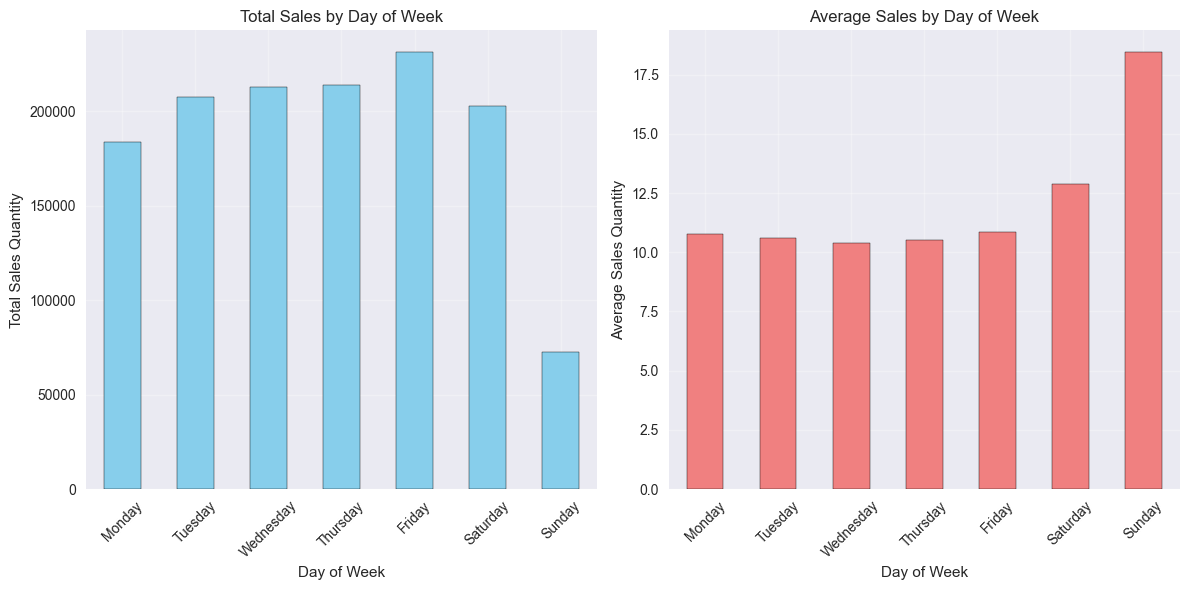

In [11]:
# Sales Analysis by Day of Week
print("=== SALES BY DAY OF WEEK ===")
daily_sales = df.groupby('DayOfWeek')['Sales Qty.'].agg(['sum', 'mean', 'count', 'median', 'std']).round(2)
daily_sales = daily_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Calculate mode for each day of week
print("\nMode (Most Frequent Sales Quantity) by Day of Week:")
daily_modes = {}
for day in daily_sales.index:
    day_data = df[df['DayOfWeek'] == day]['Sales Qty.']
    mode_value = day_data.mode()
    if len(mode_value) > 0:
        daily_modes[day] = mode_value.iloc[0]
        print(f"{day}: {mode_value.iloc[0]} (appears {day_data.value_counts().iloc[0]} times)")
    else:
        daily_modes[day] = None
        print(f"{day}: No mode found")

print(f"\nDetailed Statistics by Day of Week:")
print(daily_sales)

# Plot sales by day of week
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
daily_sales['sum'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
daily_sales['mean'].plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



=== SALES BY MONTH ===

Mode (Most Frequent Sales Quantity) by Month:
January: 1.0 (appears 1013 times)
February: 2.0 (appears 2315 times)
March: 1.0 (appears 3355 times)
April: 1.0 (appears 2097 times)
May: 1.0 (appears 2195 times)
June: 1.0 (appears 1520 times)
July: 1.0 (appears 1322 times)
August: 1.0 (appears 1423 times)
September: 2.0 (appears 1480 times)
October: 2.0 (appears 1247 times)
November: 1.0 (appears 1320 times)
December: 2.0 (appears 2020 times)

Detailed Statistics by Month and Year:
    Year  MonthName       sum   mean  count  median     std
1   2021   November     144.5  36.12      4    40.0   23.10
0   2021   December       1.0   1.00      1     1.0     NaN
6   2022    January    6250.0  13.53    462     3.0   28.47
5   2022   February   23036.0   8.94   2576     3.0   15.37
9   2022      March   34072.0   8.79   3877     3.0   14.66
2   2022      April   41698.0   9.88   4219     4.0   16.51
10  2022        May   20794.0   8.85   2349     3.0   16.48
8   2022   

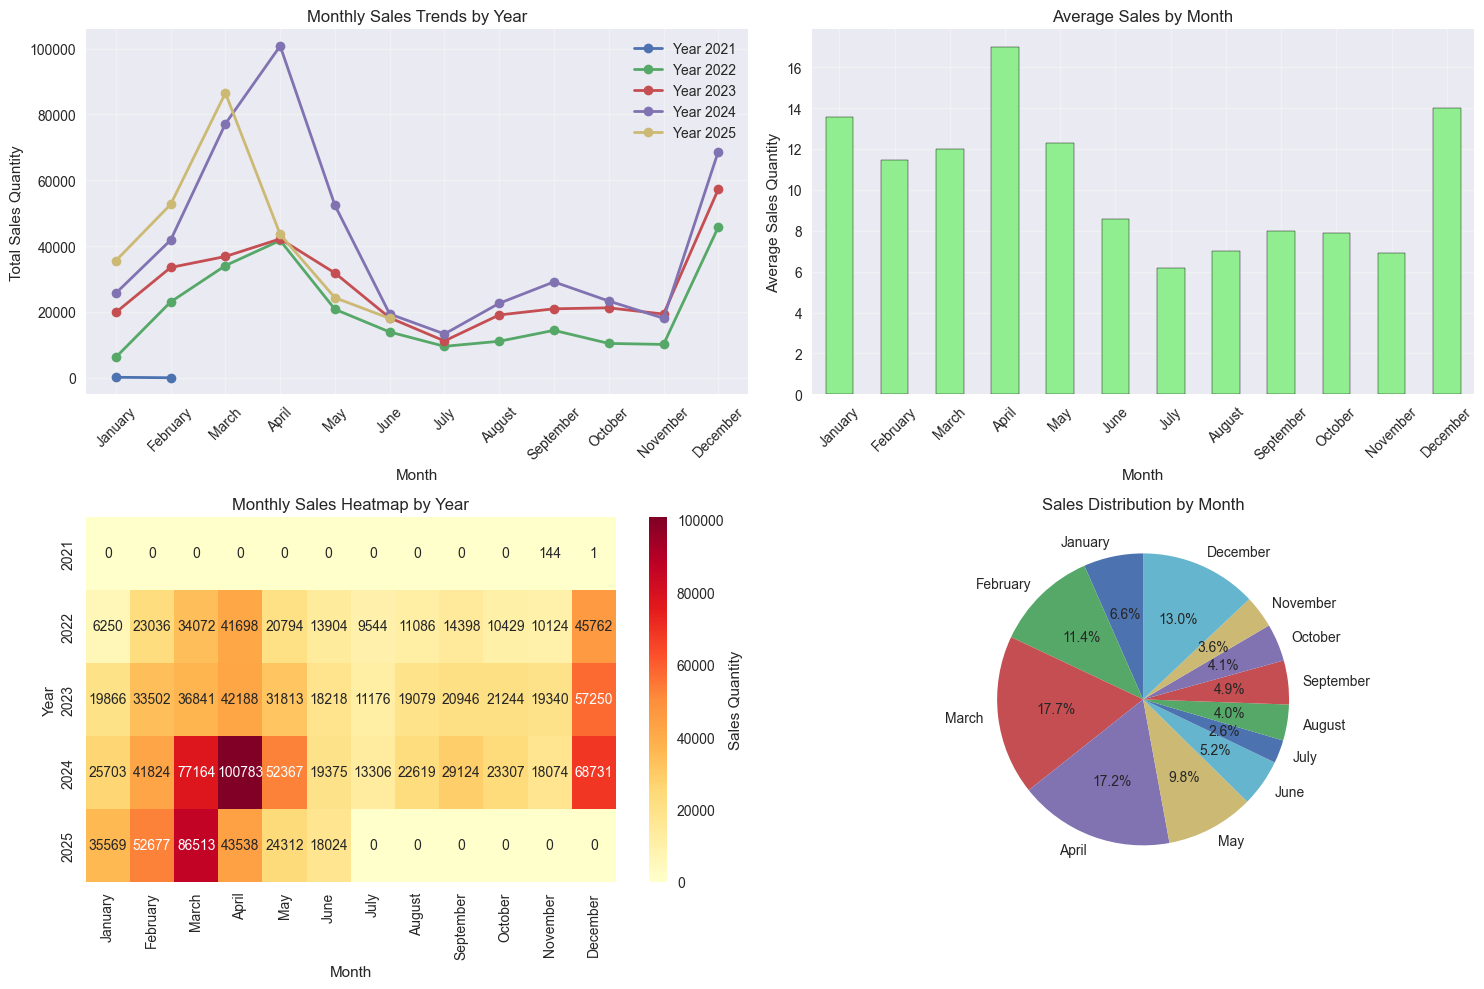

In [12]:
# Sales Analysis by Month
print("\n=== SALES BY MONTH ===")
monthly_sales = df.groupby(['Year', 'MonthName'])['Sales Qty.'].agg(['sum', 'mean', 'count', 'median', 'std']).round(2)
monthly_sales = monthly_sales.reset_index()

# Create month order for proper sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['MonthName'] = pd.Categorical(monthly_sales['MonthName'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(['Year', 'MonthName'])

# Calculate mode for each month
print("\nMode (Most Frequent Sales Quantity) by Month:")
monthly_modes = {}
for month in month_order:
    month_data = df[df['MonthName'] == month]['Sales Qty.']
    if len(month_data) > 0:
        mode_value = month_data.mode()
        if len(mode_value) > 0:
            monthly_modes[month] = mode_value.iloc[0]
            print(f"{month}: {mode_value.iloc[0]} (appears {month_data.value_counts().iloc[0]} times)")
        else:
            monthly_modes[month] = None
            print(f"{month}: No mode found")
    else:
        monthly_modes[month] = None
        print(f"{month}: No data available")

print(f"\nDetailed Statistics by Month and Year:")
print(monthly_sales)

# Plot sales by month
plt.figure(figsize=(15, 10))

# Subplot 1: Monthly sales by year
plt.subplot(2, 2, 1)
for year in sorted(df['Year'].unique()):
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(range(len(year_data)), year_data['sum'], marker='o', label=f'Year {year}', linewidth=2)
plt.title('Monthly Sales Trends by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.xticks(range(12), month_order, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Average monthly sales
plt.subplot(2, 2, 2)
avg_monthly = df.groupby('MonthName')['Sales Qty.'].mean().reindex(month_order)
avg_monthly.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 3: Monthly sales heatmap
plt.subplot(2, 2, 3)
pivot_monthly = df.groupby(['Year', 'MonthName'])['Sales Qty.'].sum().unstack(fill_value=0)
pivot_monthly = pivot_monthly.reindex(columns=month_order)
import seaborn as sns
sns.heatmap(pivot_monthly, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Sales Quantity'})
plt.title('Monthly Sales Heatmap by Year')
plt.xlabel('Month')
plt.ylabel('Year')

# Subplot 4: Monthly sales distribution
plt.subplot(2, 2, 4)
monthly_totals = df.groupby('MonthName')['Sales Qty.'].sum().reindex(month_order)
plt.pie(monthly_totals.values, labels=monthly_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Month')

plt.tight_layout()
plt.show()


=== SALES BY YEAR ===

Mode (Most Frequent Sales Quantity) by Year:
Year 2021: 40.0 (appears 2 times)
Year 2022: 2.0 (appears 5412 times)
Year 2023: 1.0 (appears 6964 times)
Year 2024: 1.0 (appears 5163 times)
Year 2025: 1.0 (appears 3769 times)

Detailed Statistics by Year:
           sum   mean  count  median    std
Year                                       
2021     145.5  29.10      5    40.0  25.43
2022  241096.5   8.80  27389     3.0  16.22
2023  331463.0   8.85  37454     3.0  16.60
2024  492376.5  14.99  32856     5.0  45.18
2025  260633.0  12.55  20761     5.0  22.85

Year-over-Year Growth:
2021: 146 (Base Year)
2022: 241,096 (+165602.1%)
2023: 331,463 (+37.5%)
2024: 492,376 (+48.5%)
2025: 260,633 (-47.1%)


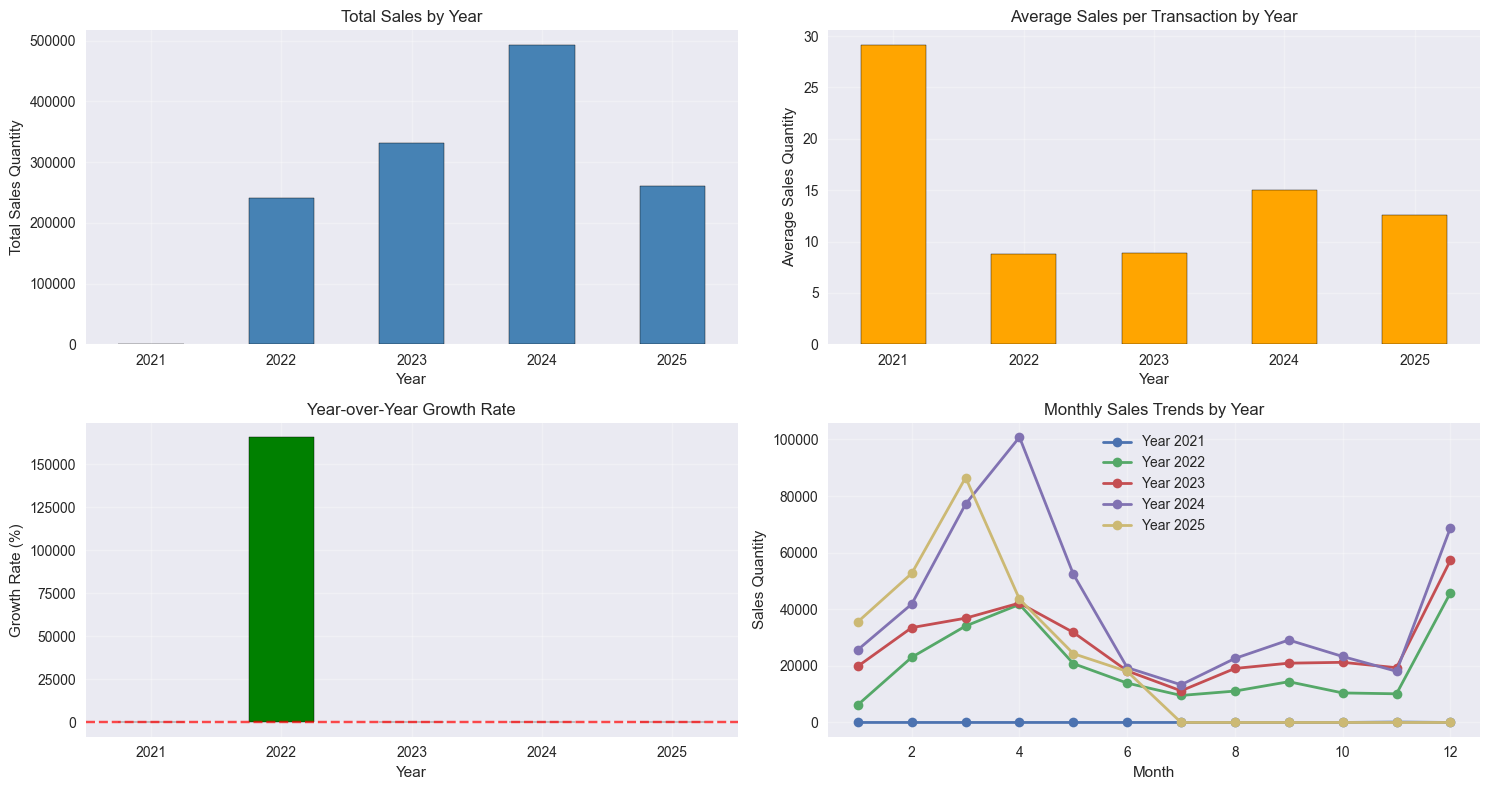

In [13]:
# Sales Analysis by Year
print("\n=== SALES BY YEAR ===")
yearly_sales = df.groupby('Year')['Sales Qty.'].agg(['sum', 'mean', 'count', 'median', 'std']).round(2)

# Calculate mode for each year
print("\nMode (Most Frequent Sales Quantity) by Year:")
yearly_modes = {}
for year in sorted(df['Year'].unique()):
    year_data = df[df['Year'] == year]['Sales Qty.']
    mode_value = year_data.mode()
    if len(mode_value) > 0:
        yearly_modes[year] = mode_value.iloc[0]
        print(f"Year {year}: {mode_value.iloc[0]} (appears {year_data.value_counts().iloc[0]} times)")
    else:
        yearly_modes[year] = None
        print(f"Year {year}: No mode found")

print(f"\nDetailed Statistics by Year:")
print(yearly_sales)

# Calculate year-over-year growth
yearly_totals = df.groupby('Year')['Sales Qty.'].sum()
yoy_growth = yearly_totals.pct_change() * 100
print(f"\nYear-over-Year Growth:")
for year in sorted(yearly_totals.index):
    if year == yearly_totals.index[0]:
        print(f"{year}: {yearly_totals[year]:,.0f} (Base Year)")
    else:
        growth = yoy_growth[year]
        print(f"{year}: {yearly_totals[year]:,.0f} ({growth:+.1f}%)")

# Plot sales by year
plt.figure(figsize=(15, 8))

# Subplot 1: Total sales by year
plt.subplot(2, 2, 1)
yearly_totals.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Subplot 2: Average sales by year
plt.subplot(2, 2, 2)
yearly_sales['mean'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Sales per Transaction by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales Quantity')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Subplot 3: Year-over-year growth
plt.subplot(2, 2, 3)
yoy_growth.plot(kind='bar', color='green', edgecolor='black')
plt.title('Year-over-Year Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=0)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3)

# Subplot 4: Monthly trends by year (line plot)
plt.subplot(2, 2, 4)
monthly_pivot = df.groupby(['Year', 'Month'])['Sales Qty.'].sum().unstack(fill_value=0)
for year in monthly_pivot.index:
    plt.plot(monthly_pivot.columns, monthly_pivot.loc[year], marker='o', label=f'Year {year}', linewidth=2)
plt.title('Monthly Sales Trends by Year')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



=== MODE ANALYSIS VISUALIZATIONS ===


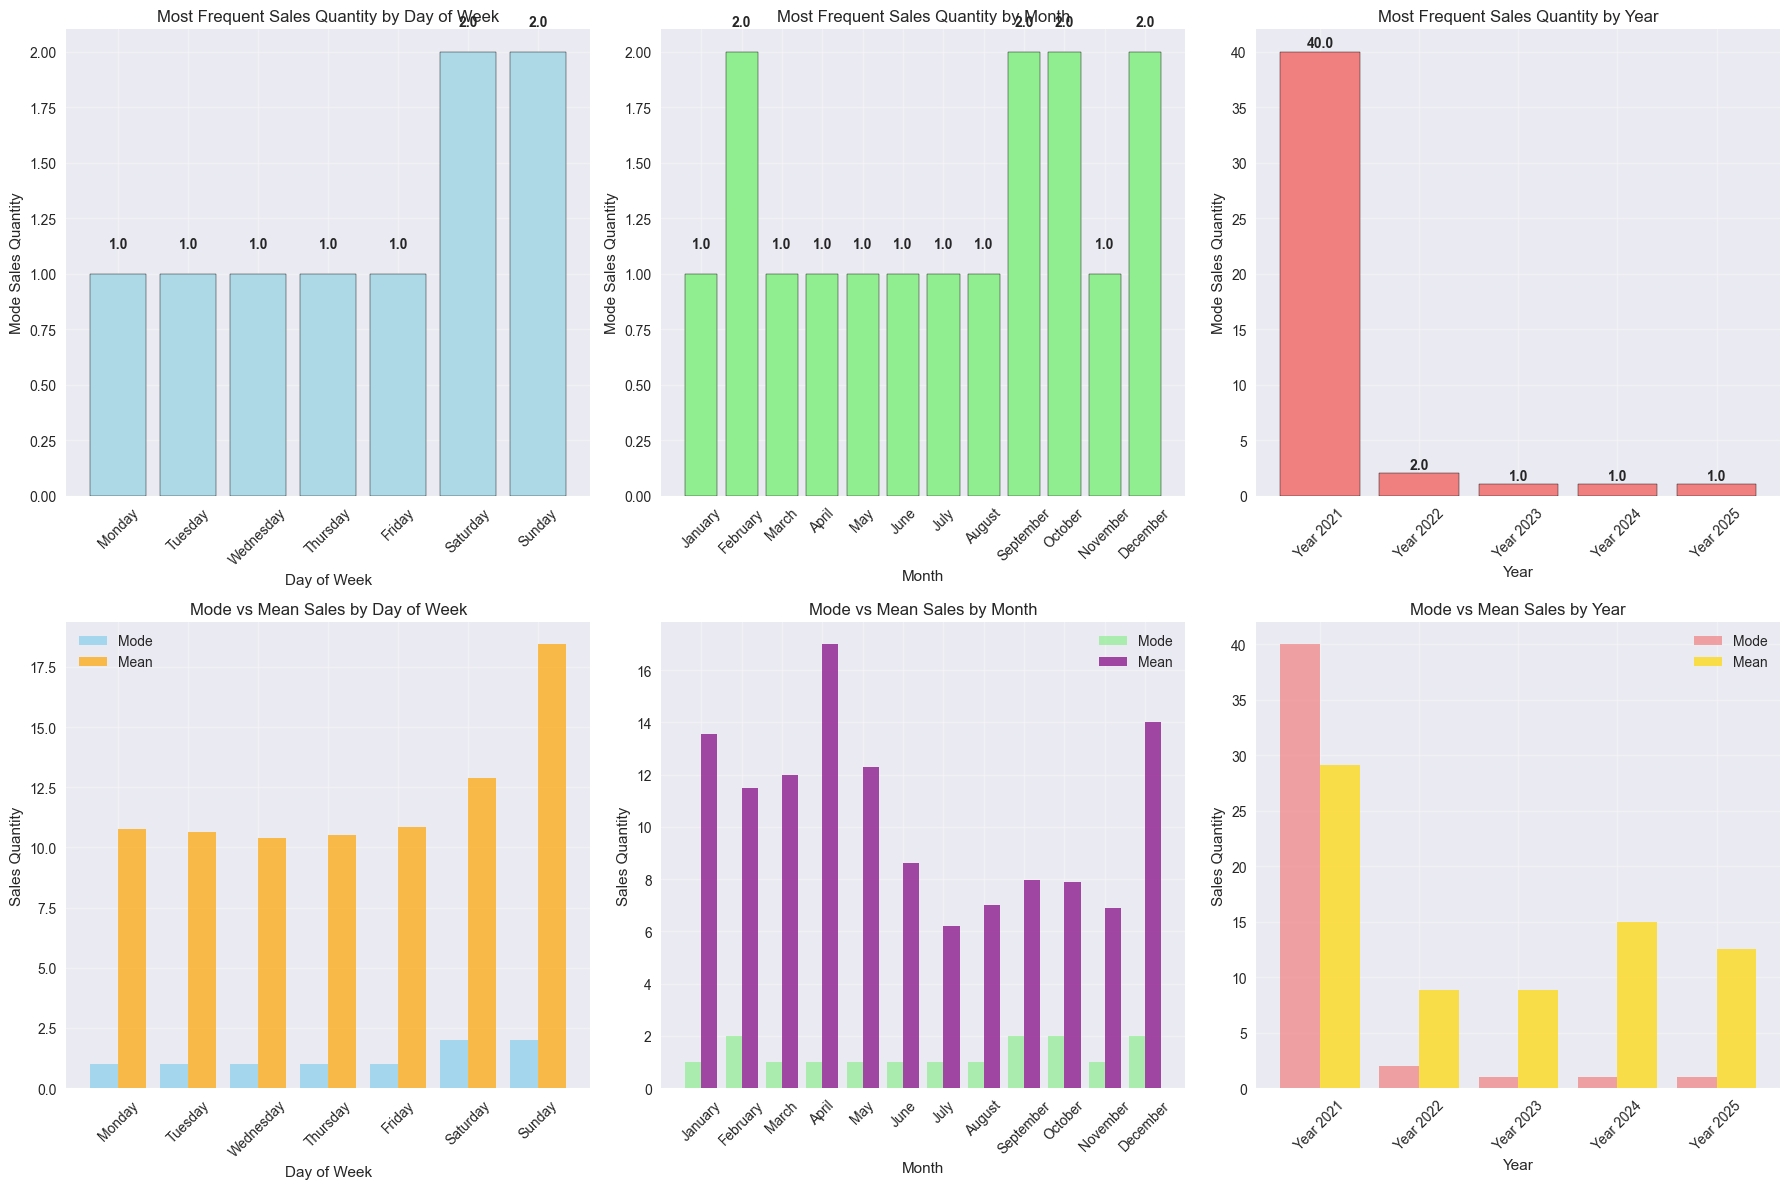

In [14]:
# Mode Analysis Visualizations
print("\n=== MODE ANALYSIS VISUALIZATIONS ===")

# Create visualizations for mode analysis
plt.figure(figsize=(18, 12))

# Subplot 1: Mode by Day of Week
plt.subplot(2, 3, 1)
daily_mode_values = [daily_modes[day] if daily_modes[day] is not None else 0 for day in daily_sales.index]
bars1 = plt.bar(daily_sales.index, daily_mode_values, color='lightblue', edgecolor='black')
plt.title('Most Frequent Sales Quantity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Mode Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, daily_mode_values):
    if value > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                str(value), ha='center', va='bottom', fontweight='bold')

# Subplot 2: Mode by Month
plt.subplot(2, 3, 2)
monthly_mode_values = [monthly_modes[month] if monthly_modes[month] is not None else 0 for month in month_order]
bars2 = plt.bar(month_order, monthly_mode_values, color='lightgreen', edgecolor='black')
plt.title('Most Frequent Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Mode Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, monthly_mode_values):
    if value > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                str(value), ha='center', va='bottom', fontweight='bold')

# Subplot 3: Mode by Year
plt.subplot(2, 3, 3)
yearly_mode_values = [yearly_modes[year] if yearly_modes[year] is not None else 0 for year in sorted(df['Year'].unique())]
bars3 = plt.bar([f'Year {year}' for year in sorted(df['Year'].unique())], yearly_mode_values, 
                color='lightcoral', edgecolor='black')
plt.title('Most Frequent Sales Quantity by Year')
plt.xlabel('Year')
plt.ylabel('Mode Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars3, yearly_mode_values):
    if value > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                str(value), ha='center', va='bottom', fontweight='bold')

# Subplot 4: Mode vs Mean Comparison - Day of Week
plt.subplot(2, 3, 4)
x_pos = range(len(daily_sales.index))
plt.bar([x - 0.2 for x in x_pos], daily_mode_values, 0.4, label='Mode', color='skyblue', alpha=0.7)
plt.bar([x + 0.2 for x in x_pos], daily_sales['mean'], 0.4, label='Mean', color='orange', alpha=0.7)
plt.title('Mode vs Mean Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales Quantity')
plt.xticks(x_pos, daily_sales.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Mode vs Mean Comparison - Month
plt.subplot(2, 3, 5)
monthly_means = [df[df['MonthName'] == month]['Sales Qty.'].mean() for month in month_order]
x_pos = range(len(month_order))
plt.bar([x - 0.2 for x in x_pos], monthly_mode_values, 0.4, label='Mode', color='lightgreen', alpha=0.7)
plt.bar([x + 0.2 for x in x_pos], monthly_means, 0.4, label='Mean', color='purple', alpha=0.7)
plt.title('Mode vs Mean Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.xticks(x_pos, month_order, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Mode vs Mean Comparison - Year
plt.subplot(2, 3, 6)
yearly_means = [yearly_sales.loc[year, 'mean'] for year in sorted(df['Year'].unique())]
x_pos = range(len(sorted(df['Year'].unique())))
plt.bar([x - 0.2 for x in x_pos], yearly_mode_values, 0.4, label='Mode', color='lightcoral', alpha=0.7)
plt.bar([x + 0.2 for x in x_pos], yearly_means, 0.4, label='Mean', color='gold', alpha=0.7)
plt.title('Mode vs Mean Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales Quantity')
plt.xticks(x_pos, [f'Year {year}' for year in sorted(df['Year'].unique())], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [15]:
# Comprehensive Sales Summary
print("=" * 60)
print("COMPREHENSIVE SALES ANALYSIS SUMMARY")
print("=" * 60)

# Overall statistics
print(f"\n📊 OVERALL STATISTICS:")
print(f"   • Total Records: {len(df):,}")
print(f"   • Date Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"   • Total Sales Quantity: {df['Sales Qty.'].sum():,.0f}")
print(f"   • Average Sales per Transaction: {df['Sales Qty.'].mean():.2f}")
print(f"   • Total Unique Items: {df['Item Code'].nunique():,}")
print(f"   • Total Branches: {df['Branch'].nunique()}")
print(f"   • States Covered: {df['State'].nunique()}")

# Best performing metrics
print(f"\n🏆 TOP PERFORMERS:")
print(f"   • Best Sales Day: {daily_sales['sum'].idxmax()} ({daily_sales['sum'].max():,.0f} units)")
print(f"   • Best Sales Month: {monthly_totals.idxmax()} ({monthly_totals.max():,.0f} units)")
print(f"   • Best Sales Year: {yearly_totals.idxmax()} ({yearly_totals.max():,.0f} units)")

# Mode insights
print(f"\n📊 MODE ANALYSIS (Most Frequent Sales Quantities):")
print(f"   • Most Common Sales by Day: {max(daily_modes, key=daily_modes.get)} ({daily_modes[max(daily_modes, key=daily_modes.get)]} units)")
print(f"   • Most Common Sales by Month: {max(monthly_modes, key=monthly_modes.get)} ({monthly_modes[max(monthly_modes, key=monthly_modes.get)]} units)")
print(f"   • Most Common Sales by Year: Year {max(yearly_modes, key=yearly_modes.get)} ({yearly_modes[max(yearly_modes, key=yearly_modes.get)]} units)")

# Mode vs Mean comparison
print(f"\n📈 MODE vs MEAN COMPARISON:")
print(f"   • Day with highest mode: {max(daily_modes, key=daily_modes.get)} (mode: {daily_modes[max(daily_modes, key=daily_modes.get)]}, mean: {daily_sales.loc[max(daily_modes, key=daily_modes.get), 'mean']:.2f})")
print(f"   • Month with highest mode: {max(monthly_modes, key=monthly_modes.get)} (mode: {monthly_modes[max(monthly_modes, key=monthly_modes.get)]}, mean: {df[df['MonthName'] == max(monthly_modes, key=monthly_modes.get)]['Sales Qty.'].mean():.2f})")
print(f"   • Year with highest mode: Year {max(yearly_modes, key=yearly_modes.get)} (mode: {yearly_modes[max(yearly_modes, key=yearly_modes.get)]}, mean: {yearly_sales.loc[max(yearly_modes, key=yearly_modes.get), 'mean']:.2f})")

# Seasonal patterns
print(f"\n📈 SEASONAL PATTERNS:")
print(f"   • Peak Month: {monthly_totals.idxmax()}")
print(f"   • Lowest Month: {monthly_totals.idxmin()}")
print(f"   • Peak Day: {daily_sales['sum'].idxmax()}")
print(f"   • Lowest Day: {daily_sales['sum'].idxmin()}")

# Growth analysis
if len(yoy_growth) > 1:
    avg_growth = yoy_growth.mean()
    print(f"\n📊 GROWTH ANALYSIS:")
    print(f"   • Average YoY Growth: {avg_growth:.1f}%")
    if avg_growth > 0:
        print(f"   • Overall Trend: 📈 Growing")
    else:
        print(f"   • Overall Trend: 📉 Declining")

print("\n" + "=" * 60)


COMPREHENSIVE SALES ANALYSIS SUMMARY

📊 OVERALL STATISTICS:
   • Total Records: 118,465
   • Date Range: 2021-11-24 to 2025-06-30
   • Total Sales Quantity: 1,325,714
   • Average Sales per Transaction: 11.19
   • Total Unique Items: 111
   • Total Branches: 5
   • States Covered: 5

🏆 TOP PERFORMERS:
   • Best Sales Day: Friday (231,366 units)
   • Best Sales Month: March (234,590 units)
   • Best Sales Year: 2024 (492,376 units)

📊 MODE ANALYSIS (Most Frequent Sales Quantities):
   • Most Common Sales by Day: Saturday (2.0 units)
   • Most Common Sales by Month: February (2.0 units)
   • Most Common Sales by Year: Year 2021 (40.0 units)

📈 MODE vs MEAN COMPARISON:
   • Day with highest mode: Saturday (mode: 2.0, mean: 12.88)
   • Month with highest mode: February (mode: 2.0, mean: 11.48)
   • Year with highest mode: Year 2021 (mode: 40.0, mean: 29.10)

📈 SEASONAL PATTERNS:
   • Peak Month: March
   • Lowest Month: July
   • Peak Day: Friday
   • Lowest Day: Sunday

📊 GROWTH ANALYSIS:

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,118465,2023-11-12 08:37:38.489849344,2021-11-24 00:00:00,2023-02-13 00:00:00,2023-11-20 00:00:00,2024-10-10 00:00:00,2025-06-30 00:00:00,NaN
Sales Qty.,118465.0,11.190769,-144.0,2.0,4.0,10.0,1948.0,28.511709
Tonnage,118465.0,1.444455,0.8,1.0,1.5,1.5,2.6,0.352623
Year,118465.0,2023.396564,2021.0,2023.0,2023.0,2024.0,2025.0,1.025895
Month,118465.0,5.997738,1.0,3.0,5.0,9.0,12.0,3.493196
Day,118465.0,20.063859,1.0,14.0,21.0,27.0,31.0,8.154205


In [17]:
df.head()

,Date,Branch,Item Code,Sales Qty.,State,Status,Star rating,Tonnage,Year,Month,Day,DayOfWeek,MonthName
0,2021-11-24,HYDERABAD,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,2021,11,24,Wednesday,November
1,2021-11-24,HYDERABAD,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,2021,11,24,Wednesday,November
2,2021-11-25,CHENNAI,RHT50UV16V,4.5,Tamil Nadu,Continue,5 Star,1.5,2021,11,25,Thursday,November
3,2021-11-30,HYDERABAD,RHT50UV16V,60.0,Telangana,Continue,5 Star,1.5,2021,11,30,Tuesday,November
4,2021-12-24,HYDERABAD,RHT50UV16V,1.0,Telangana,Continue,5 Star,1.5,2021,12,24,Friday,December


In [18]:
df['Sales Qty.'] = df['Sales Qty.'].apply(lambda x: -x if x < 0 else x)

In [20]:
df.sort_values(by='Date', ascending=True)

,Date,Branch,Item Code,Sales Qty.,State,Status,Star rating,Tonnage,Year,Month,Day,DayOfWeek,MonthName
0,2021-11-24,HYDERABAD,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,2021,11,24,Wednesday,November
1,2021-11-24,HYDERABAD,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,2021,11,24,Wednesday,November
2,2021-11-25,CHENNAI,RHT50UV16V,4.5,Tamil Nadu,Continue,5 Star,1.5,2021,11,25,Thursday,November
3,2021-11-30,HYDERABAD,RHT50UV16V,60.0,Telangana,Continue,5 Star,1.5,2021,11,30,Tuesday,November
4,2021-12-24,HYDERABAD,RHT50UV16V,1.0,Telangana,Continue,5 Star,1.5,2021,12,24,Friday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118139,2025-06-30,BANGALORE,RKL50UV16VAF,7.0,Karnataka,Continue,3 Star,1.5,2025,6,30,Monday,June
118138,2025-06-30,BANGALORE,RKL50UV16VAF,5.0,Karnataka,Continue,3 Star,1.5,2025,6,30,Monday,June
118137,2025-06-30,BANGALORE,RKL50UV16VAF,15.0,Karnataka,Continue,3 Star,1.5,2025,6,30,Monday,June
118149,2025-06-30,COCHIN,RKL50UV16VAF,2.0,Kerala,Continue,3 Star,1.5,2025,6,30,Monday,June


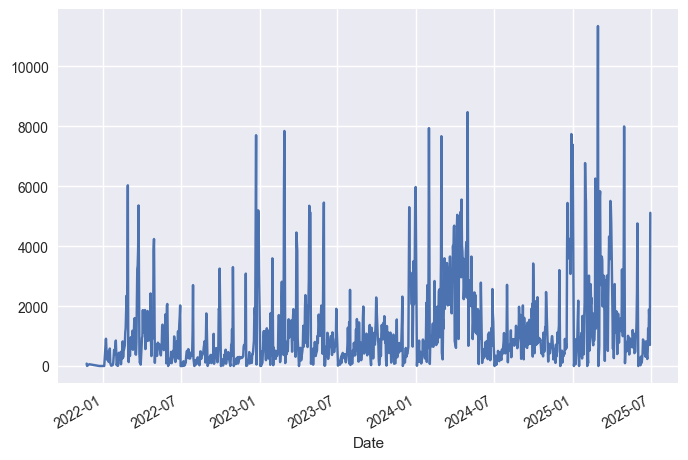

In [21]:
df.groupby('Date')['Sales Qty.'].sum().plot()
plt.show()


In [22]:
# =============================================================================
# OUTLIER DETECTION ANALYSIS
# =============================================================================

import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

print("=" * 60)
print("OUTLIER DETECTION ANALYSIS")
print("=" * 60)

# 1. STATISTICAL OUTLIER DETECTION METHODS
print("\n📊 1. STATISTICAL OUTLIER DETECTION")
print("-" * 40)

# Basic statistics for Sales Qty.
sales_qty = df['Sales Qty.']
print(f"Sales Quantity Statistics:")
print(f"  • Count: {len(sales_qty):,}")
print(f"  • Mean: {sales_qty.mean():.2f}")
print(f"  • Median: {sales_qty.median():.2f}")
print(f"  • Std: {sales_qty.std():.2f}")
print(f"  • Min: {sales_qty.min():.2f}")
print(f"  • Max: {sales_qty.max():.2f}")
print(f"  • Skewness: {stats.skew(sales_qty):.2f}")
print(f"  • Kurtosis: {stats.kurtosis(sales_qty):.2f}")

# IQR Method
Q1 = sales_qty.quantile(0.25)
Q3 = sales_qty.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(sales_qty < lower_bound) | (sales_qty > upper_bound)]
print(f"\nIQR Method Outliers:")
print(f"  • Lower bound: {lower_bound:.2f}")
print(f"  • Upper bound: {upper_bound:.2f}")
print(f"  • Number of outliers: {len(iqr_outliers):,} ({len(iqr_outliers)/len(df)*100:.2f}%)")

# Z-Score Method (using 3 standard deviations)
z_scores = np.abs(stats.zscore(sales_qty))
z_outliers = df[z_scores > 3]
print(f"\nZ-Score Method (|z| > 3) Outliers:")
print(f"  • Number of outliers: {len(z_outliers):,} ({len(z_outliers)/len(df)*100:.2f}%)")

# Modified Z-Score Method (using median absolute deviation)
median = sales_qty.median()
mad = np.median(np.abs(sales_qty - median))
modified_z_scores = 0.6745 * (sales_qty - median) / mad
modified_z_outliers = df[np.abs(modified_z_scores) > 3.5]
print(f"\nModified Z-Score Method (|MZ| > 3.5) Outliers:")
print(f"  • Number of outliers: {len(modified_z_outliers):,} ({len(modified_z_outliers)/len(df)*100:.2f}%)")


OUTLIER DETECTION ANALYSIS

📊 1. STATISTICAL OUTLIER DETECTION
----------------------------------------
Sales Quantity Statistics:
  • Count: 118,465
  • Mean: 11.39
  • Median: 4.00
  • Std: 28.43
  • Min: 0.00
  • Max: 1948.00
  • Skewness: 17.03
  • Kurtosis: 632.32

IQR Method Outliers:
  • Lower bound: -10.00
  • Upper bound: 22.00
  • Number of outliers: 13,832 (11.68%)

Z-Score Method (|z| > 3) Outliers:
  • Number of outliers: 2,143 (1.81%)

Modified Z-Score Method (|MZ| > 3.5) Outliers:
  • Number of outliers: 17,913 (15.12%)


In [23]:
# 2. MACHINE LEARNING OUTLIER DETECTION
print("\n🤖 2. MACHINE LEARNING OUTLIER DETECTION")
print("-" * 40)

# Isolation Forest
# Prepare features for ML-based outlier detection
ml_features = df[['Sales Qty.', 'Tonnage']].copy()
ml_features['Year'] = df['Year']
ml_features['Month'] = df['Month']
ml_features['Day'] = df['Day']

# Handle any remaining NaN values
ml_features = ml_features.fillna(ml_features.median())

# Standardize features
scaler = StandardScaler()
ml_features_scaled = scaler.fit_transform(ml_features)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(ml_features_scaled)

# Get outliers
iso_outliers = df[outlier_labels == -1]
print(f"Isolation Forest Outliers (contamination=0.1):")
print(f"  • Number of outliers: {len(iso_outliers):,} ({len(iso_outliers)/len(df)*100:.2f}%)")

# One-Class SVM (alternative ML method)
from sklearn.svm import OneClassSVM
one_class_svm = OneClassSVM(nu=0.1)
svm_outlier_labels = one_class_svm.fit_predict(ml_features_scaled)
svm_outliers = df[svm_outlier_labels == -1]
print(f"\nOne-Class SVM Outliers (nu=0.1):")
print(f"  • Number of outliers: {len(svm_outliers):,} ({len(svm_outliers)/len(df)*100:.2f}%)")



🤖 2. MACHINE LEARNING OUTLIER DETECTION
----------------------------------------
Isolation Forest Outliers (contamination=0.1):
  • Number of outliers: 11,847 (10.00%)

One-Class SVM Outliers (nu=0.1):
  • Number of outliers: 11,890 (10.04%)



📊 3. OUTLIER VISUALIZATION
----------------------------------------


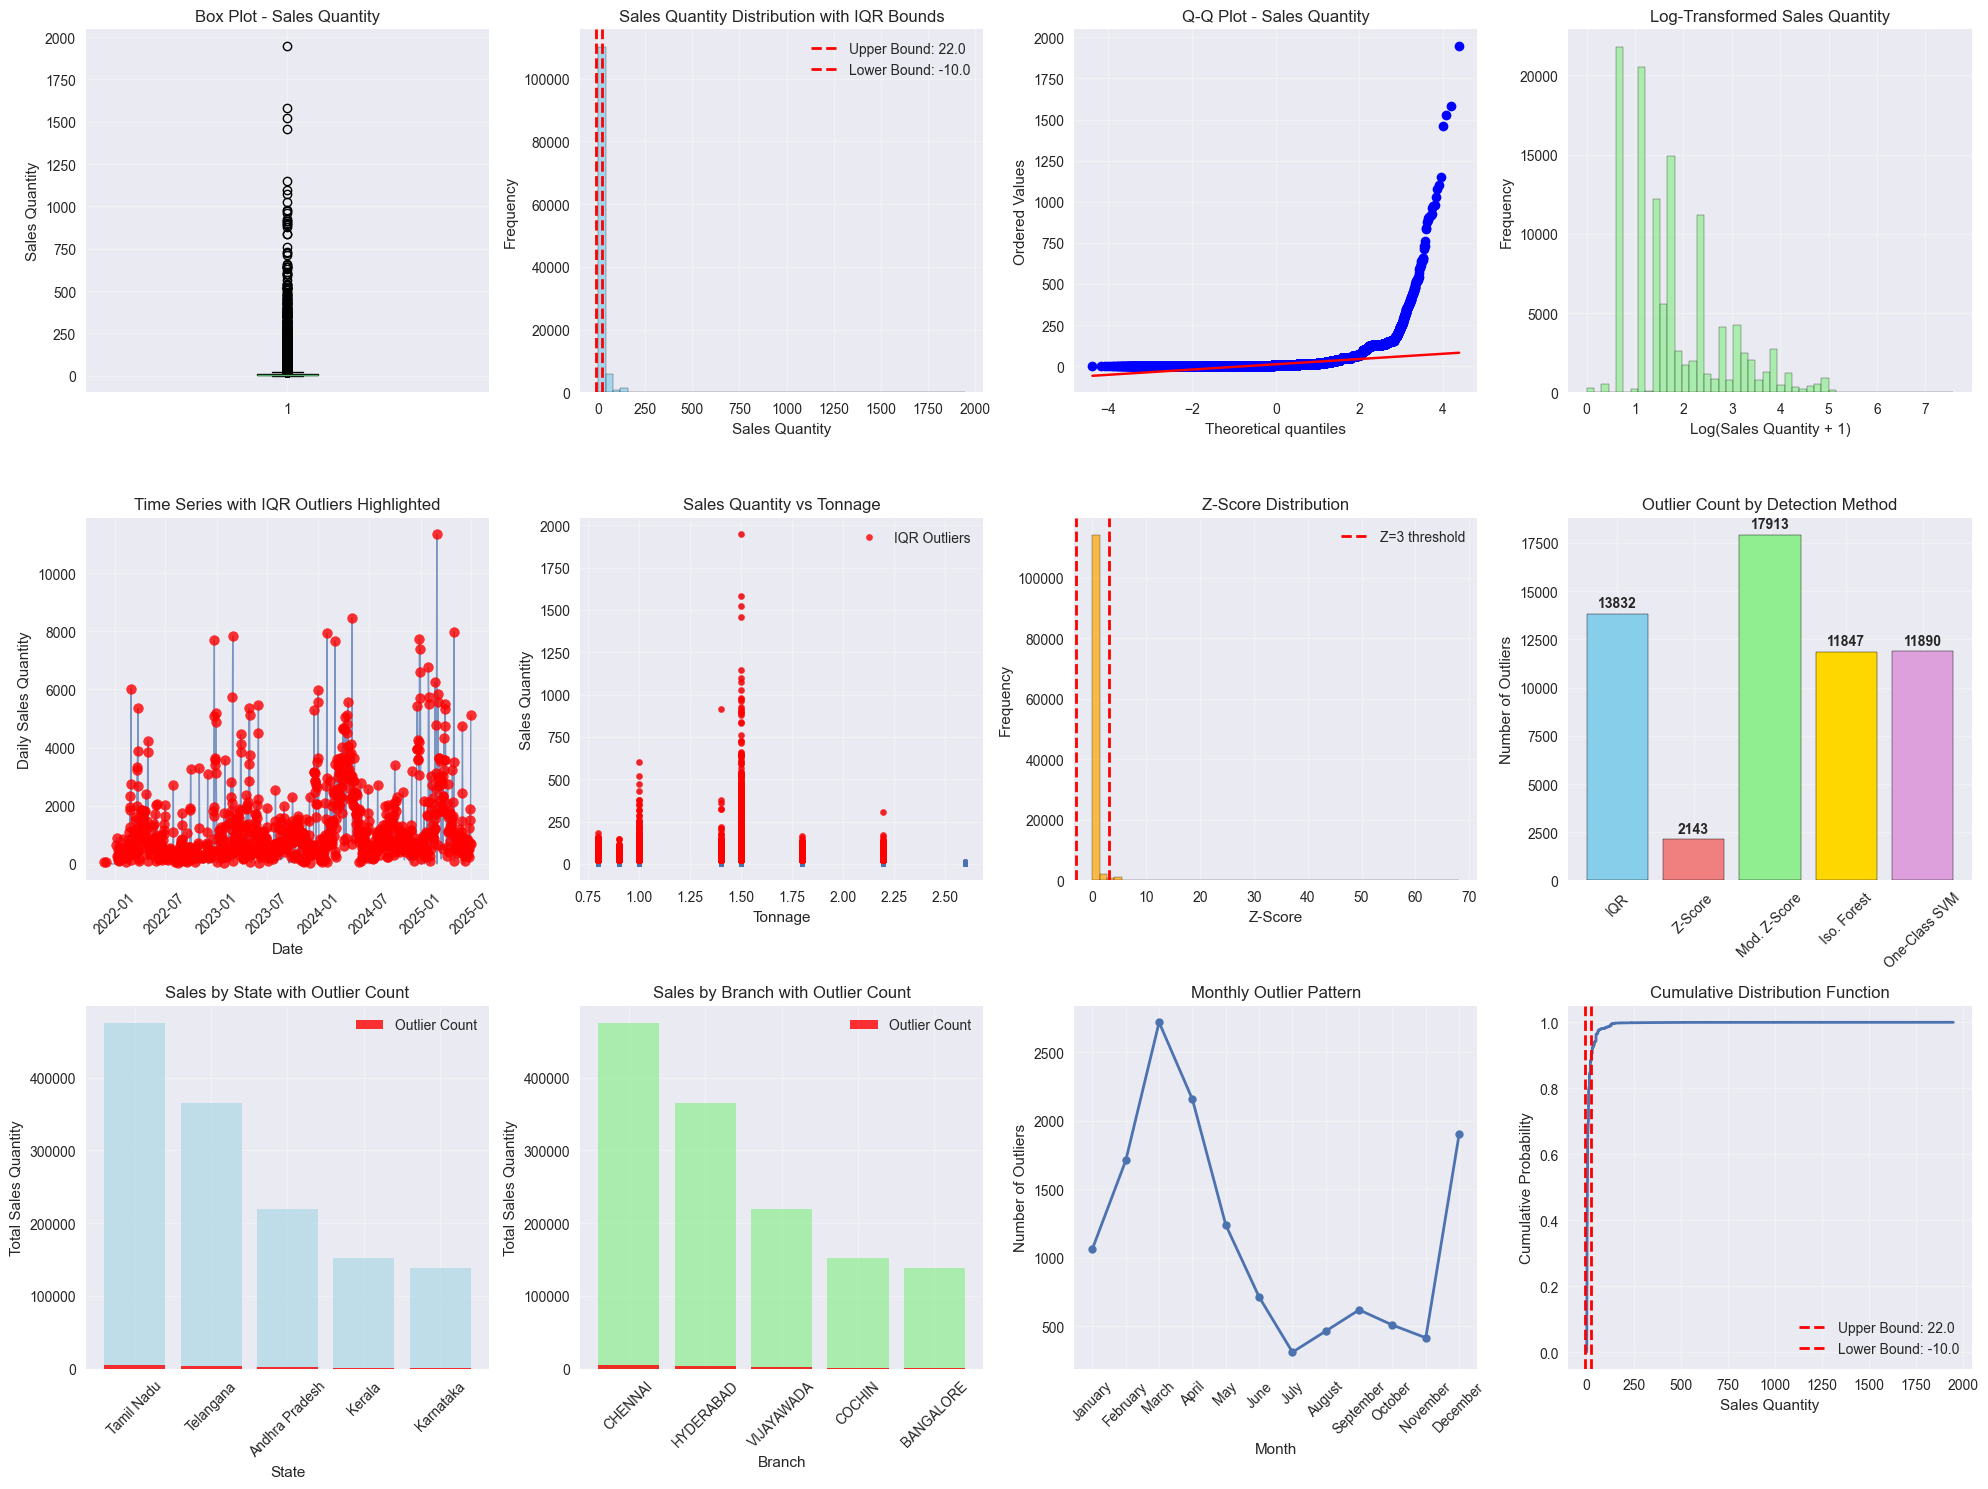

In [24]:
# 3. OUTLIER VISUALIZATION
print("\n📊 3. OUTLIER VISUALIZATION")
print("-" * 40)

# Create comprehensive outlier visualization
plt.figure(figsize=(20, 15))

# Subplot 1: Box Plot for Sales Quantity
plt.subplot(3, 4, 1)
plt.boxplot(sales_qty, vert=True, patch_artist=True)
plt.title('Box Plot - Sales Quantity')
plt.ylabel('Sales Quantity')
plt.grid(True, alpha=0.3)

# Subplot 2: Histogram with outlier highlighting
plt.subplot(3, 4, 2)
plt.hist(sales_qty, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper Bound: {upper_bound:.1f}')
plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: {lower_bound:.1f}')
plt.title('Sales Quantity Distribution with IQR Bounds')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Q-Q Plot
plt.subplot(3, 4, 3)
stats.probplot(sales_qty, dist="norm", plot=plt)
plt.title('Q-Q Plot - Sales Quantity')
plt.grid(True, alpha=0.3)

# Subplot 4: Log-transformed histogram
plt.subplot(3, 4, 4)
log_sales = np.log1p(sales_qty)  # log1p to handle zeros
plt.hist(log_sales, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Log-Transformed Sales Quantity')
plt.xlabel('Log(Sales Quantity + 1)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Subplot 5: Time series with outliers highlighted
plt.subplot(3, 4, 5)
daily_sales_ts = df.groupby('Date')['Sales Qty.'].sum()
plt.plot(daily_sales_ts.index, daily_sales_ts.values, alpha=0.7, linewidth=1)
# Highlight outliers in time series
outlier_dates = iqr_outliers['Date'].unique()
for date in outlier_dates:
    if date in daily_sales_ts.index:
        plt.scatter(date, daily_sales_ts[date], color='red', s=50, alpha=0.8, zorder=5)
plt.title('Time Series with IQR Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Daily Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 6: Sales vs Tonnage scatter plot
plt.subplot(3, 4, 6)
plt.scatter(df['Tonnage'], df['Sales Qty.'], alpha=0.5, s=10)
plt.scatter(iqr_outliers['Tonnage'], iqr_outliers['Sales Qty.'], 
           color='red', alpha=0.8, s=20, label='IQR Outliers')
plt.title('Sales Quantity vs Tonnage')
plt.xlabel('Tonnage')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 7: Z-score distribution
plt.subplot(3, 4, 7)
plt.hist(z_scores, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(3, color='red', linestyle='--', linewidth=2, label='Z=3 threshold')
plt.axvline(-3, color='red', linestyle='--', linewidth=2)
plt.title('Z-Score Distribution')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 8: Outlier comparison by method
plt.subplot(3, 4, 8)
methods = ['IQR', 'Z-Score', 'Mod. Z-Score', 'Iso. Forest', 'One-Class SVM']
outlier_counts = [len(iqr_outliers), len(z_outliers), len(modified_z_outliers), 
                 len(iso_outliers), len(svm_outliers)]
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']
bars = plt.bar(methods, outlier_counts, color=colors, edgecolor='black')
plt.title('Outlier Count by Detection Method')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, outlier_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(outlier_counts)*0.01, 
             str(count), ha='center', va='bottom', fontweight='bold')

# Subplot 9: Sales by State with outliers
plt.subplot(3, 4, 9)
state_sales = df.groupby('State')['Sales Qty.'].sum().sort_values(ascending=False)
state_outliers = iqr_outliers.groupby('State')['Sales Qty.'].count()
plt.bar(state_sales.index, state_sales.values, alpha=0.7, color='lightblue')
plt.bar(state_outliers.index, state_outliers.values, alpha=0.8, color='red', 
        label='Outlier Count')
plt.title('Sales by State with Outlier Count')
plt.xlabel('State')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 10: Sales by Branch with outliers
plt.subplot(3, 4, 10)
branch_sales = df.groupby('Branch')['Sales Qty.'].sum().sort_values(ascending=False)
branch_outliers = iqr_outliers.groupby('Branch')['Sales Qty.'].count()
plt.bar(branch_sales.index, branch_sales.values, alpha=0.7, color='lightgreen')
plt.bar(branch_outliers.index, branch_outliers.values, alpha=0.8, color='red', 
        label='Outlier Count')
plt.title('Sales by Branch with Outlier Count')
plt.xlabel('Branch')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 11: Monthly outlier pattern
plt.subplot(3, 4, 11)
monthly_outliers = iqr_outliers.groupby('MonthName')['Sales Qty.'].count()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_outliers = monthly_outliers.reindex(month_order, fill_value=0)
plt.plot(monthly_outliers.index, monthly_outliers.values, marker='o', linewidth=2, markersize=6)
plt.title('Monthly Outlier Pattern')
plt.xlabel('Month')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 12: Cumulative distribution
plt.subplot(3, 4, 12)
sorted_sales = np.sort(sales_qty)
cumulative = np.arange(1, len(sorted_sales) + 1) / len(sorted_sales)
plt.plot(sorted_sales, cumulative, linewidth=2)
plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper Bound: {upper_bound:.1f}')
plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: {lower_bound:.1f}')
plt.title('Cumulative Distribution Function')
plt.xlabel('Sales Quantity')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [25]:
# 4. DETAILED OUTLIER ANALYSIS BY DIMENSIONS
print("\n🔍 4. DETAILED OUTLIER ANALYSIS BY DIMENSIONS")
print("-" * 50)

# Focus on IQR outliers for detailed analysis (most conservative method)
outliers = iqr_outliers.copy()

print(f"\n📊 OUTLIER SUMMARY:")
print(f"  • Total outliers: {len(outliers):,}")
print(f"  • Percentage of data: {len(outliers)/len(df)*100:.2f}%")
print(f"  • Sales quantity range: {outliers['Sales Qty.'].min():.2f} to {outliers['Sales Qty.'].max():.2f}")

# Analysis by Time Dimensions
print(f"\n📅 TIME DIMENSION ANALYSIS:")
print(f"  • Date range: {outliers['Date'].min().strftime('%Y-%m-%d')} to {outliers['Date'].max().strftime('%Y-%m-%d')}")

# Outliers by Year
yearly_outliers = outliers.groupby('Year').agg({
    'Sales Qty.': ['count', 'sum', 'mean', 'min', 'max'],
    'Date': 'nunique'
}).round(2)
yearly_outliers.columns = ['Count', 'Total_Sales', 'Avg_Sales', 'Min_Sales', 'Max_Sales', 'Unique_Days']
print(f"\n  Yearly Outlier Distribution:")
print(yearly_outliers)

# Outliers by Month
monthly_outliers = outliers.groupby('MonthName').agg({
    'Sales Qty.': ['count', 'sum', 'mean'],
    'Date': 'nunique'
}).round(2)
monthly_outliers.columns = ['Count', 'Total_Sales', 'Avg_Sales', 'Unique_Days']
monthly_outliers = monthly_outliers.reindex(month_order, fill_value=0)
print(f"\n  Monthly Outlier Distribution:")
print(monthly_outliers)

# Outliers by Day of Week
dow_outliers = outliers.groupby('DayOfWeek').agg({
    'Sales Qty.': ['count', 'sum', 'mean'],
    'Date': 'nunique'
}).round(2)
dow_outliers.columns = ['Count', 'Total_Sales', 'Avg_Sales', 'Unique_Days']
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_outliers = dow_outliers.reindex(dow_order, fill_value=0)
print(f"\n  Day of Week Outlier Distribution:")
print(dow_outliers)



🔍 4. DETAILED OUTLIER ANALYSIS BY DIMENSIONS
--------------------------------------------------

📊 OUTLIER SUMMARY:
  • Total outliers: 13,832
  • Percentage of data: 11.68%
  • Sales quantity range: 23.00 to 1948.00

📅 TIME DIMENSION ANALYSIS:
  • Date range: 2021-11-24 to 2025-06-30

  Yearly Outlier Distribution:
      Count  Total_Sales  Avg_Sales  Min_Sales  Max_Sales  Unique_Days
Year                                                                  
2021      3        140.0      46.67       40.0       60.0            2
2022   2725     131109.0      48.11       23.0      175.0          257
2023   3492     173010.0      49.54       23.0      180.0          286
2024   4644     341106.0      73.45       23.0     1948.0          306
2025   2968     168871.0      56.90       23.0      175.0          146

  Monthly Outlier Distribution:
           Count  Total_Sales  Avg_Sales  Unique_Days
MonthName                                            
January     1066      60349.0      56.61   

In [26]:
# Analysis by Location Dimensions
print(f"\n🌍 LOCATION DIMENSION ANALYSIS:")

# Outliers by State
state_outliers = outliers.groupby('State').agg({
    'Sales Qty.': ['count', 'sum', 'mean', 'min', 'max'],
    'Date': 'nunique'
}).round(2)
state_outliers.columns = ['Count', 'Total_Sales', 'Avg_Sales', 'Min_Sales', 'Max_Sales', 'Unique_Days']
state_outliers = state_outliers.sort_values('Count', ascending=False)
print(f"\n  State Outlier Distribution:")
print(state_outliers)

# Outliers by Branch
branch_outliers = outliers.groupby('Branch').agg({
    'Sales Qty.': ['count', 'sum', 'mean', 'min', 'max'],
    'Date': 'nunique'
}).round(2)
branch_outliers.columns = ['Count', 'Total_Sales', 'Avg_Sales', 'Min_Sales', 'Max_Sales', 'Unique_Days']
branch_outliers = branch_outliers.sort_values('Count', ascending=False)
print(f"\n  Branch Outlier Distribution:")
print(branch_outliers)

# Analysis by Product Dimensions
print(f"\n📦 PRODUCT DIMENSION ANALYSIS:")

# Outliers by Item Code (top 20)
item_outliers = outliers.groupby('Item Code').agg({
    'Sales Qty.': ['count', 'sum', 'mean', 'min', 'max'],
    'Date': 'nunique'
}).round(2)
item_outliers.columns = ['Count', 'Total_Sales', 'Avg_Sales', 'Min_Sales', 'Max_Sales', 'Unique_Days']
item_outliers = item_outliers.sort_values('Count', ascending=False)
print(f"\n  Top 20 Item Codes with Most Outliers:")
print(item_outliers.head(20))

# Outliers by Star Rating
star_outliers = outliers.groupby('Star rating').agg({
    'Sales Qty.': ['count', 'sum', 'mean', 'min', 'max'],
    'Date': 'nunique'
}).round(2)
star_outliers.columns = ['Count', 'Total_Sales', 'Avg_Sales', 'Min_Sales', 'Max_Sales', 'Unique_Days']
print(f"\n  Star Rating Outlier Distribution:")
print(star_outliers)

# Tonnage analysis for outliers
print(f"\n⚖️ TONNAGE ANALYSIS FOR OUTLIERS:")
print(f"  • Outlier tonnage range: {outliers['Tonnage'].min():.2f} to {outliers['Tonnage'].max():.2f}")
print(f"  • Outlier tonnage mean: {outliers['Tonnage'].mean():.2f}")
print(f"  • Outlier tonnage median: {outliers['Tonnage'].median():.2f}")

# Tonnage distribution for outliers
tonnage_outliers = outliers.groupby(pd.cut(outliers['Tonnage'], bins=10)).agg({
    'Sales Qty.': ['count', 'mean', 'min', 'max']
}).round(2)
tonnage_outliers.columns = ['Count', 'Avg_Sales', 'Min_Sales', 'Max_Sales']
print(f"\n  Tonnage Range Outlier Distribution:")
print(tonnage_outliers)



🌍 LOCATION DIMENSION ANALYSIS:

  State Outlier Distribution:
                Count  Total_Sales  Avg_Sales  Min_Sales  Max_Sales  \
State                                                                 
Tamil Nadu       5266     307365.0      58.37       23.0     1948.0   
Telangana        3938     269981.0      68.56       23.0     1458.0   
Andhra Pradesh   2093     122180.0      58.38       23.0     1580.0   
Karnataka        1528      64159.0      41.99       23.0      275.0   
Kerala           1007      50551.0      50.20       23.0      603.0   

                Unique_Days  
State                        
Tamil Nadu              767  
Telangana               757  
Andhra Pradesh          548  
Karnataka               459  
Kerala                  398  

  Branch Outlier Distribution:
            Count  Total_Sales  Avg_Sales  Min_Sales  Max_Sales  Unique_Days
Branch                                                                      
CHENNAI      5266     307365.0      58.37  

C:\Users\sahil\AppData\Local\Temp\ipykernel_38336\3792883945.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tonnage_outliers = outliers.groupby(pd.cut(outliers['Tonnage'], bins=10)).agg({


In [27]:
# 5. OUTLIER PATTERN ANALYSIS AND INSIGHTS
print("\n🔍 5. OUTLIER PATTERN ANALYSIS AND INSIGHTS")
print("-" * 50)

# Extreme outliers analysis
extreme_outliers = outliers[outliers['Sales Qty.'] > outliers['Sales Qty.'].quantile(0.95)]
print(f"\n🚨 EXTREME OUTLIERS (Top 5% of outliers):")
print(f"  • Count: {len(extreme_outliers):,}")
print(f"  • Sales range: {extreme_outliers['Sales Qty.'].min():.2f} to {extreme_outliers['Sales Qty.'].max():.2f}")
print(f"  • Average sales: {extreme_outliers['Sales Qty.'].mean():.2f}")

# Most extreme outliers
print(f"\n  Top 10 Most Extreme Outliers:")
extreme_top10 = extreme_outliers.nlargest(10, 'Sales Qty.')[['Date', 'Branch', 'Item Code', 'State', 'Sales Qty.', 'Tonnage']]
print(extreme_top10)

# Outlier clustering analysis
print(f"\n📊 OUTLIER CLUSTERING ANALYSIS:")

# Outliers by date clustering
outlier_dates = outliers['Date'].value_counts().sort_values(ascending=False)
print(f"\n  Days with Most Outliers:")
print(outlier_dates.head(10))

# Outliers by item clustering
outlier_items = outliers['Item Code'].value_counts().sort_values(ascending=False)
print(f"\n  Items with Most Outliers:")
print(outlier_items.head(10))

# Outliers by branch clustering
outlier_branches = outliers['Branch'].value_counts().sort_values(ascending=False)
print(f"\n  Branches with Most Outliers:")
print(outlier_branches.head(10))

# Temporal patterns in outliers
print(f"\n📅 TEMPORAL PATTERNS IN OUTLIERS:")

# Outliers by year comparison
yearly_outlier_rate = outliers.groupby('Year').size() / df.groupby('Year').size() * 100
print(f"\n  Outlier Rate by Year (% of transactions):")
for year in sorted(yearly_outlier_rate.index):
    print(f"    {year}: {yearly_outlier_rate[year]:.2f}%")

# Outliers by month comparison
monthly_outlier_rate = outliers.groupby('MonthName').size() / df.groupby('MonthName').size() * 100
monthly_outlier_rate = monthly_outlier_rate.reindex(month_order, fill_value=0)
print(f"\n  Outlier Rate by Month (% of transactions):")
for month in month_order:
    if monthly_outlier_rate[month] > 0:
        print(f"    {month}: {monthly_outlier_rate[month]:.2f}%")

# Outliers by day of week comparison
dow_outlier_rate = outliers.groupby('DayOfWeek').size() / df.groupby('DayOfWeek').size() * 100
dow_outlier_rate = dow_outlier_rate.reindex(dow_order, fill_value=0)
print(f"\n  Outlier Rate by Day of Week (% of transactions):")
for day in dow_order:
    if dow_outlier_rate[day] > 0:
        print(f"    {day}: {dow_outlier_rate[day]:.2f}%")



🔍 5. OUTLIER PATTERN ANALYSIS AND INSIGHTS
--------------------------------------------------

🚨 EXTREME OUTLIERS (Top 5% of outliers):
  • Count: 651
  • Sales range: 131.00 to 1948.00
  • Average sales: 236.42

  Top 10 Most Extreme Outliers:
            Date      Branch     Item Code           State  Sales Qty.  \
78178 2024-04-30     CHENNAI    RL50UV16U3      Tamil Nadu      1948.0   
77120 2024-04-06  VIJAYAWADA   RKM50UV16VA  Andhra Pradesh      1580.0   
77552 2024-04-17  VIJAYAWADA   RKM50UV16VA  Andhra Pradesh      1525.0   
79196 2024-05-31   HYDERABAD  RKL50UV16VAF       Telangana      1458.0   
77322 2024-04-12     CHENNAI  RKL50UV16VAF      Tamil Nadu      1148.0   
77506 2024-04-16   HYDERABAD   RKM50UV16VA       Telangana      1099.0   
77677 2024-04-20   HYDERABAD  RKL50UV16VAF       Telangana      1076.0   
77911 2024-04-25     CHENNAI  RKL50UV16VAF      Tamil Nadu      1029.0   
77603 2024-04-18  VIJAYAWADA   RKM50UV16VA  Andhra Pradesh       979.0   
77296 2024-04-

In [28]:
# 6. RECOMMENDATIONS FOR OUTLIER HANDLING
print("\n💡 6. RECOMMENDATIONS FOR OUTLIER HANDLING")
print("=" * 60)

print("\n📋 OUTLIER HANDLING STRATEGIES:")
print("-" * 40)

print("\n1. 🔍 INVESTIGATION PRIORITIES:")
print("   • Focus on extreme outliers (top 5% of outliers)")
print("   • Investigate items with highest outlier frequency")
print("   • Check branches with disproportionate outlier rates")
print("   • Analyze temporal patterns (seasonal outliers)")

print("\n2. 🛠️ DATA CLEANING OPTIONS:")
print("   • CAP OUTLIERS: Replace extreme values with upper/lower bounds")
print("   • WINSORIZE: Replace outliers with 95th/5th percentile values")
print("   • REMOVE OUTLIERS: Delete outlier records (use with caution)")
print("   • TRANSFORM: Apply log transformation to reduce outlier impact")
print("   • SEGMENT: Analyze outliers separately from normal data")

print("\n3. 📊 BUSINESS CONTEXT CONSIDERATIONS:")
print("   • Verify if outliers represent legitimate business events")
print("   • Check for data entry errors or system issues")
print("   • Consider seasonal patterns and promotional events")
print("   • Evaluate impact on forecasting models")

print("\n4. 🎯 SPECIFIC RECOMMENDATIONS FOR THIS DATASET:")

# Calculate impact metrics
total_sales = df['Sales Qty.'].sum()
outlier_sales = outliers['Sales Qty.'].sum()
outlier_impact = (outlier_sales / total_sales) * 100

print(f"   • Outliers represent {outlier_impact:.2f}% of total sales volume")
print(f"   • {len(outliers):,} outlier records out of {len(df):,} total records")

# Identify most problematic areas
worst_state = state_outliers.index[0]
worst_branch = branch_outliers.index[0]
worst_item = item_outliers.index[0]

print(f"   • Most problematic state: {worst_state} ({state_outliers.iloc[0]['Count']} outliers)")
print(f"   • Most problematic branch: {worst_branch} ({branch_outliers.iloc[0]['Count']} outliers)")
print(f"   • Most problematic item: {worst_item} ({item_outliers.iloc[0]['Count']} outliers)")

print("\n5. 🔧 IMPLEMENTATION SUGGESTIONS:")
print("   • Create outlier flags for monitoring")
print("   • Implement automated outlier detection alerts")
print("   • Develop separate models for outlier vs normal data")
print("   • Consider robust statistical methods (median-based)")
print("   • Document outlier handling decisions for reproducibility")

print("\n6. 📈 MONITORING RECOMMENDATIONS:")
print("   • Track outlier rates by time period")
print("   • Monitor outlier patterns by location/product")
print("   • Set up alerts for unusual outlier spikes")
print("   • Regular review of outlier detection thresholds")

print("\n" + "=" * 60)
print("OUTLIER ANALYSIS COMPLETE")
print("=" * 60)



💡 6. RECOMMENDATIONS FOR OUTLIER HANDLING

📋 OUTLIER HANDLING STRATEGIES:
----------------------------------------

1. 🔍 INVESTIGATION PRIORITIES:
   • Focus on extreme outliers (top 5% of outliers)
   • Investigate items with highest outlier frequency
   • Check branches with disproportionate outlier rates
   • Analyze temporal patterns (seasonal outliers)

2. 🛠️ DATA CLEANING OPTIONS:
   • CAP OUTLIERS: Replace extreme values with upper/lower bounds
   • WINSORIZE: Replace outliers with 95th/5th percentile values
   • REMOVE OUTLIERS: Delete outlier records (use with caution)
   • TRANSFORM: Apply log transformation to reduce outlier impact
   • SEGMENT: Analyze outliers separately from normal data

3. 📊 BUSINESS CONTEXT CONSIDERATIONS:
   • Verify if outliers represent legitimate business events
   • Check for data entry errors or system issues
   • Consider seasonal patterns and promotional events
   • Evaluate impact on forecasting models

4. 🎯 SPECIFIC RECOMMENDATIONS FOR THIS D

In [29]:
# 7. OUTLIER HANDLING IMPLEMENTATION EXAMPLES
print("\n🔧 7. OUTLIER HANDLING IMPLEMENTATION EXAMPLES")
print("=" * 60)

# Create a copy of the original dataframe for demonstration
df_cleaned = df.copy()

print("\n📊 BEFORE CLEANING:")
print(f"  • Total records: {len(df_cleaned):,}")
print(f"  • Sales range: {df_cleaned['Sales Qty.'].min():.2f} to {df_cleaned['Sales Qty.'].max():.2f}")
print(f"  • Sales mean: {df_cleaned['Sales Qty.'].mean():.2f}")
print(f"  • Sales std: {df_cleaned['Sales Qty.'].std():.2f}")

# Method 1: Capping outliers (Winsorizing)
print(f"\n🛠️ METHOD 1: CAPPING OUTLIERS (Winsorizing at 95th percentile)")
df_capped = df.copy()
cap_value = df_capped['Sales Qty.'].quantile(0.95)
df_capped['Sales Qty.'] = df_capped['Sales Qty.'].clip(upper=cap_value)
capped_outliers = len(df[df['Sales Qty.'] > cap_value])
print(f"  • Capped {capped_outliers:,} records at {cap_value:.2f}")
print(f"  • New max value: {df_capped['Sales Qty.'].max():.2f}")
print(f"  • New mean: {df_capped['Sales Qty.'].mean():.2f}")

# Method 2: Log transformation
print(f"\n🛠️ METHOD 2: LOG TRANSFORMATION")
df_log = df.copy()
df_log['Sales Qty. Log'] = np.log1p(df_log['Sales Qty.'])
print(f"  • Original sales range: {df['Sales Qty.'].min():.2f} to {df['Sales Qty.'].max():.2f}")
print(f"  • Log sales range: {df_log['Sales Qty. Log'].min():.2f} to {df_log['Sales Qty. Log'].max():.2f}")
print(f"  • Log sales mean: {df_log['Sales Qty. Log'].mean():.2f}")

# Method 3: Removing outliers
print(f"\n🛠️ METHOD 3: REMOVING OUTLIERS")
df_removed = df[~df.index.isin(outliers.index)].copy()
removed_count = len(df) - len(df_removed)
print(f"  • Removed {removed_count:,} outlier records")
print(f"  • Remaining records: {len(df_removed):,}")
print(f"  • New sales range: {df_removed['Sales Qty.'].min():.2f} to {df_removed['Sales Qty.'].max():.2f}")
print(f"  • New mean: {df_removed['Sales Qty.'].mean():.2f}")

# Method 4: Outlier flagging
print(f"\n🛠️ METHOD 4: OUTLIER FLAGGING")
df_flagged = df.copy()
df_flagged['is_outlier'] = df_flagged.index.isin(outliers.index)
df_flagged['outlier_type'] = 'normal'
df_flagged.loc[df_flagged['is_outlier'], 'outlier_type'] = 'outlier'
df_flagged.loc[df_flagged['Sales Qty.'] > extreme_outliers['Sales Qty.'].min(), 'outlier_type'] = 'extreme_outlier'

outlier_counts = df_flagged['outlier_type'].value_counts()
print(f"  • Normal records: {outlier_counts.get('normal', 0):,}")
print(f"  • Outlier records: {outlier_counts.get('outlier', 0):,}")
print(f"  • Extreme outlier records: {outlier_counts.get('extreme_outlier', 0):,}")

# Comparison of methods
print(f"\n📊 COMPARISON OF METHODS:")
print(f"  {'Method':<20} {'Records':<10} {'Mean':<10} {'Std':<10} {'Max':<10}")
print(f"  {'-'*20} {'-'*10} {'-'*10} {'-'*10} {'-'*10}")
print(f"  {'Original':<20} {len(df):<10} {df['Sales Qty.'].mean():<10.2f} {df['Sales Qty.'].std():<10.2f} {df['Sales Qty.'].max():<10.2f}")
print(f"  {'Capped':<20} {len(df_capped):<10} {df_capped['Sales Qty.'].mean():<10.2f} {df_capped['Sales Qty.'].std():<10.2f} {df_capped['Sales Qty.'].max():<10.2f}")
print(f"  {'Log Transformed':<20} {len(df_log):<10} {df_log['Sales Qty. Log'].mean():<10.2f} {df_log['Sales Qty. Log'].std():<10.2f} {df_log['Sales Qty. Log'].max():<10.2f}")
print(f"  {'Outliers Removed':<20} {len(df_removed):<10} {df_removed['Sales Qty.'].mean():<10.2f} {df_removed['Sales Qty.'].std():<10.2f} {df_removed['Sales Qty.'].max():<10.2f}")

print(f"\n✅ OUTLIER HANDLING EXAMPLES COMPLETE")
print(f"Choose the method that best fits your analysis needs!")



🔧 7. OUTLIER HANDLING IMPLEMENTATION EXAMPLES

📊 BEFORE CLEANING:
  • Total records: 118,465
  • Sales range: 0.00 to 1948.00
  • Sales mean: 11.39
  • Sales std: 28.43

🛠️ METHOD 1: CAPPING OUTLIERS (Winsorizing at 95th percentile)
  • Capped 4,363 records at 50.00
  • New max value: 50.00
  • New mean: 9.24

🛠️ METHOD 2: LOG TRANSFORMATION
  • Original sales range: 0.00 to 1948.00
  • Log sales range: 0.00 to 7.58
  • Log sales mean: 1.82

🛠️ METHOD 3: REMOVING OUTLIERS
  • Removed 13,832 outlier records
  • Remaining records: 104,633
  • New sales range: 0.00 to 22.00
  • New mean: 5.12

🛠️ METHOD 4: OUTLIER FLAGGING
  • Normal records: 104,633
  • Outlier records: 13,184
  • Extreme outlier records: 648

📊 COMPARISON OF METHODS:
  Method               Records    Mean       Std        Max       
  -------------------- ---------- ---------- ---------- ----------
  Original             118465     11.39      28.43      1948.00   
  Capped               118465     9.24       12.73     

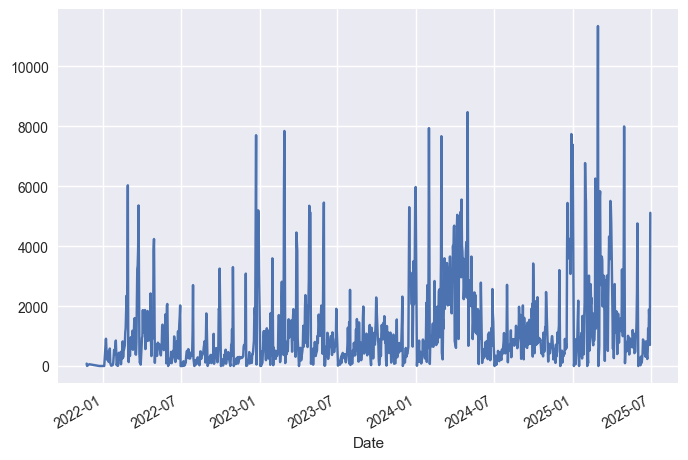

In [30]:
df.groupby('Date')['Sales Qty.'].sum().plot()
plt.show()

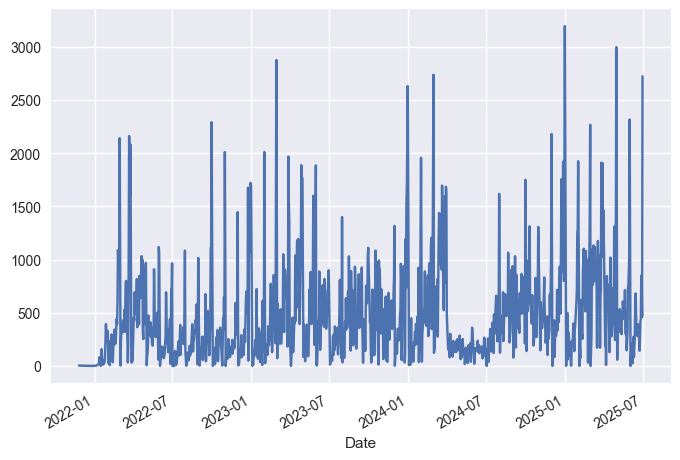

In [31]:
df_removed.groupby('Date')['Sales Qty.'].sum().plot()
plt.show()

In [32]:
df.head()

,Date,Branch,Item Code,Sales Qty.,State,Status,Star rating,Tonnage,Year,Month,Day,DayOfWeek,MonthName
0,2021-11-24,HYDERABAD,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,2021,11,24,Wednesday,November
1,2021-11-24,HYDERABAD,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,2021,11,24,Wednesday,November
2,2021-11-25,CHENNAI,RHT50UV16V,4.5,Tamil Nadu,Continue,5 Star,1.5,2021,11,25,Thursday,November
3,2021-11-30,HYDERABAD,RHT50UV16V,60.0,Telangana,Continue,5 Star,1.5,2021,11,30,Tuesday,November
4,2021-12-24,HYDERABAD,RHT50UV16V,1.0,Telangana,Continue,5 Star,1.5,2021,12,24,Friday,December


In [56]:
df_removed['Branch'].value_counts()

Branch
CHENNAI       35097
COCHIN        22555
VIJAYAWADA    17274
HYDERABAD     16174
BANGALORE     13533
Name: count, dtype: int64

In [34]:
# =============================================================================
# WEATHER DATA AND POPULATION DATA INTEGRATION
# =============================================================================

import os
import glob

print("=" * 60)
print("WEATHER DATA AND POPULATION DATA INTEGRATION")
print("=" * 60)

# 1. LOAD ALL PROCESSED WEATHER DATA
print("\n🌤️ 1. LOADING PROCESSED WEATHER DATA")
print("-" * 40)

# Define the weather data directory
weather_dir = 'outputs/processed_weather_data/'

# State mapping for weather files
state_mapping = {
    'AP_weather_timeseries.csv': 'Andhra Pradesh',
    'KA_weather_timeseries.csv': 'Karnataka', 
    'KL_weather_timeseries.csv': 'Kerala',
    'TN_weather_timeseries.csv': 'Tamil Nadu',
    'TL_weather_timeseries.csv': 'Telangana'
}

# Load all weather data files
weather_data_list = []
for filename, state in state_mapping.items():
    filepath = os.path.join(weather_dir, filename)
    if os.path.exists(filepath):
        print(f"  • Loading {filename} for {state}")
        weather_df = pd.read_csv(filepath)
        weather_df['State'] = state
        weather_data_list.append(weather_df)
    else:
        print(f"  ⚠️  File not found: {filepath}")

# Combine all weather data
if weather_data_list:
    all_weather_data = pd.concat(weather_data_list, ignore_index=True)
    print(f"\n  ✅ Combined weather data shape: {all_weather_data.shape}")
    print(f"  • States covered: {sorted(all_weather_data['State'].unique())}")
    print(f"  • Date range: {all_weather_data['Date'].min()} to {all_weather_data['Date'].max()}")
    print(f"  • Weather columns: {list(all_weather_data.columns)}")
else:
    print("  ❌ No weather data files found!")
    all_weather_data = pd.DataFrame()

# Display sample of weather data
if not all_weather_data.empty:
    print(f"\n  Sample weather data:")
    print(all_weather_data.head())


WEATHER DATA AND POPULATION DATA INTEGRATION

🌤️ 1. LOADING PROCESSED WEATHER DATA
----------------------------------------
  • Loading AP_weather_timeseries.csv for Andhra Pradesh
  • Loading KA_weather_timeseries.csv for Karnataka
  • Loading KL_weather_timeseries.csv for Kerala
  • Loading TN_weather_timeseries.csv for Tamil Nadu
  • Loading TL_weather_timeseries.csv for Telangana

  ✅ Combined weather data shape: (300, 6)
  • States covered: ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana']
  • Date range: 2021-01-01 to 2025-12-01
  • Weather columns: ['Date', 'Max_Temp', 'Min_Temp', 'Humidity', 'Wind_Speed', 'State']

  Sample weather data:
         Date  Max_Temp  Min_Temp  Humidity  Wind_Speed           State
0  2021-01-01      29.3      22.0      74.0         8.0  Andhra Pradesh
1  2021-02-01      31.3      20.0      64.0         9.0  Andhra Pradesh
2  2021-03-01      36.1      23.0      53.0         9.0  Andhra Pradesh
3  2021-04-01      37.6      27.0      

In [35]:
# 2. PREPARE WEATHER DATA FOR MERGING
print("\n🔧 2. PREPARING WEATHER DATA FOR MERGING")
print("-" * 40)

if not all_weather_data.empty:
    # Convert Date column to datetime
    all_weather_data['Date'] = pd.to_datetime(all_weather_data['Date'])
    
    # Extract year and month for merging
    all_weather_data['Year'] = all_weather_data['Date'].dt.year
    all_weather_data['Month'] = all_weather_data['Date'].dt.month
    
    # Create a unique key for merging (Year-Month-State)
    all_weather_data['merge_key'] = all_weather_data['Year'].astype(str) + '-' + \
                                   all_weather_data['Month'].astype(str).str.zfill(2) + '-' + \
                                   all_weather_data['State']
    
    # Remove the original Date column as we'll merge on Year-Month-State
    weather_for_merge = all_weather_data.drop('Date', axis=1)
    
    print(f"  ✅ Weather data prepared for merging")
    print(f"  • Shape: {weather_for_merge.shape}")
    print(f"  • Merge key format: Year-Month-State")
    print(f"  • Sample merge keys: {weather_for_merge['merge_key'].head().tolist()}")
    
    # Display sample of prepared weather data
    print(f"\n  Sample prepared weather data:")
    print(weather_for_merge.head())
else:
    print("  ❌ No weather data available for preparation")
    weather_for_merge = pd.DataFrame()



🔧 2. PREPARING WEATHER DATA FOR MERGING
----------------------------------------
  ✅ Weather data prepared for merging
  • Shape: (300, 8)
  • Merge key format: Year-Month-State
  • Sample merge keys: ['2021-01-Andhra Pradesh', '2021-02-Andhra Pradesh', '2021-03-Andhra Pradesh', '2021-04-Andhra Pradesh', '2021-05-Andhra Pradesh']

  Sample prepared weather data:
   Max_Temp  Min_Temp  Humidity  Wind_Speed           State  Year  Month  \
0      29.3      22.0      74.0         8.0  Andhra Pradesh  2021      1   
1      31.3      20.0      64.0         9.0  Andhra Pradesh  2021      2   
2      36.1      23.0      53.0         9.0  Andhra Pradesh  2021      3   
3      37.6      27.0      54.0         9.0  Andhra Pradesh  2021      4   
4      36.7      29.0      55.0         8.0  Andhra Pradesh  2021      5   

                merge_key  
0  2021-01-Andhra Pradesh  
1  2021-02-Andhra Pradesh  
2  2021-03-Andhra Pradesh  
3  2021-04-Andhra Pradesh  
4  2021-05-Andhra Pradesh  


In [ ]:
# 3. CREATE POPULATION DATA FOR EACH BRANCH
print("\n👥 3. CREATING POPULATION DATA FOR EACH BRANCH")
print("-" * 40)

# Population data provided by user (in millions)
population_data = {
    'CHENNAI': [11.23, 11.5, 11.77, 12.05, 12.33],      # 2021-2025
    'COCHIN': [3.19, 3.30, 3.40, 3.50, 3.60],           # 2021-2025
    'HYDERABAD': [10.26, 10.53, 10.80, 11.38, 11.10],   # 2021-2025 (note: 11.10 for 2025, 11.33 for 2026)
    'VIJAYAWADA': [2.10, 2.16, 2.23, 2.29, 2.35],       # 2021-2025
    'BANGALORE': [12.76, 13.19, 13.60, 14.00, 14.39]    # 2021-2025
}

# Create population dataframe
population_list = []
years = [2021, 2022, 2023, 2024, 2025]

for branch, pop_values in population_data.items():
    for i, year in enumerate(years):
        population_list.append({
            'Branch': branch,
            'Year': year,
            'Population_Millions': pop_values[i]
        })

population_df = pd.DataFrame(population_list)

print(f"  ✅ Population data created")
print(f"  • Shape: {population_df.shape}")
print(f"  • Branches: {sorted(population_df['Branch'].unique())}")
print(f"  • Years: {sorted(population_df['Year'].unique())}")

# Display population data
print(f"\n  Population data by branch and year:")
print(population_df.pivot(index='Branch', columns='Year', values='Population_Millions').round(2))



👥 3. CREATING POPULATION DATA FOR EACH BRANCH
----------------------------------------
  ✅ Population data created
  • Shape: (25, 3)
  • Branches: ['BANGALORE', 'COCHIN', 'Chennai', 'HydraBad', 'VIJAYAWADA']
  • Years: [np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]

  Population data by branch and year:
Year         2021   2022   2023   2024   2025
Branch                                       
BANGALORE   12.76  13.19  13.60  14.00  14.39
COCHIN       3.19   3.30   3.40   3.50   3.60
Chennai     11.23  11.50  11.77  12.05  12.33
HydraBad    10.26  10.53  10.80  11.38  11.10
VIJAYAWADA   2.10   2.16   2.23   2.29   2.35


In [57]:
# 4. PREPARE MAIN DATAFRAME FOR MERGING
print("\n🔧 4. PREPARING MAIN DATAFRAME FOR MERGING")
print("-" * 40)

# Create a copy of the main dataframe for merging
df_with_weather = df_removed.copy()

# Create merge key for the main dataframe (Year-Month-State)
df_with_weather['merge_key'] = df_with_weather['Year'].astype(str) + '-' + \
                              df_with_weather['Month'].astype(str).str.zfill(2) + '-' + \
                              df_with_weather['State']

print(f"  ✅ Main dataframe prepared for merging")
print(f"  • Original shape: {df.shape}")
print(f"  • Shape with merge key: {df_with_weather.shape}")
print(f"  • Sample merge keys: {df_with_weather['merge_key'].head().tolist()}")

# Check unique merge keys in main dataframe
main_merge_keys = df_with_weather['merge_key'].unique()
print(f"  • Unique merge keys in main data: {len(main_merge_keys)}")

# Check if we have weather data for all merge keys
if not weather_for_merge.empty:
    weather_merge_keys = weather_for_merge['merge_key'].unique()
    print(f"  • Unique merge keys in weather data: {len(weather_merge_keys)}")
    
    # Find missing weather data
    missing_weather = set(main_merge_keys) - set(weather_merge_keys)
    if missing_weather:
        print(f"  ⚠️  Missing weather data for {len(missing_weather)} merge keys:")
        for key in sorted(missing_weather)[:10]:  # Show first 10
            print(f"    - {key}")
        if len(missing_weather) > 10:
            print(f"    ... and {len(missing_weather) - 10} more")
    else:
        print(f"  ✅ Weather data available for all merge keys")



🔧 4. PREPARING MAIN DATAFRAME FOR MERGING
----------------------------------------
  ✅ Main dataframe prepared for merging
  • Original shape: (118465, 19)
  • Shape with merge key: (104633, 14)
  • Sample merge keys: ['2021-11-Tamil Nadu', '2021-12-Telangana', '2022-01-Telangana', '2022-01-Tamil Nadu', '2022-01-Telangana']
  • Unique merge keys in main data: 212
  • Unique merge keys in weather data: 300
  ✅ Weather data available for all merge keys


In [59]:
# 5. MERGE WEATHER DATA WITH MAIN DATAFRAME
print("\n🔗 5. MERGING WEATHER DATA WITH MAIN DATAFRAME")
print("-" * 40)

if not weather_for_merge.empty:
    # Perform the merge
    df_with_weather = df_with_weather.merge(
        weather_for_merge, 
        on='merge_key', 
        how='left',
        suffixes=('', '_weather')
    )
    
    print(f"  ✅ Weather data merged successfully")
    print(f"  • New shape: {df_with_weather.shape}")
    print(f"  • New columns added: {[col for col in df_with_weather.columns if col not in df.columns]}")
    
    # Check for missing weather data after merge
    weather_cols = ['Max_Temp', 'Min_Temp', 'Humidity', 'Wind_Speed']
    missing_weather_count = df_with_weather[weather_cols].isnull().sum()
    
    print(f"\n  Missing weather data after merge:")
    for col in weather_cols:
        missing_count = missing_weather_count[col]
        missing_pct = (missing_count / len(df_with_weather)) * 100
        print(f"    • {col}: {missing_count:,} records ({missing_pct:.2f}%)")
    
    # Display sample of merged data
    print(f"\n  Sample of merged data:")
    sample_cols = ['Date', 'Branch', 'State', 'Year', 'Month', 'Sales Qty.'] + weather_cols
    print(df_with_weather[sample_cols].head())
    
else:
    print("  ❌ No weather data available for merging")
    print("  • Proceeding without weather data")



🔗 5. MERGING WEATHER DATA WITH MAIN DATAFRAME
----------------------------------------
  ✅ Weather data merged successfully
  • New shape: (104633, 22)
  • New columns added: ['Branch', 'merge_key', 'Date_weather', 'State_weather', 'Year_weather', 'Month_weather']

  Missing weather data after merge:
    • Max_Temp: 0 records (0.00%)
    • Min_Temp: 0 records (0.00%)
    • Humidity: 0 records (0.00%)
    • Wind_Speed: 0 records (0.00%)

  Sample of merged data:
        Date     Branch       State  Year  Month  Sales Qty.  Max_Temp  \
0 2021-11-25    CHENNAI  Tamil Nadu  2021     11         4.5      29.1   
1 2021-12-24  HYDERABAD   Telangana  2021     12         1.0      27.8   
2 2022-01-04  HYDERABAD   Telangana  2022      1         2.0      27.8   
3 2022-01-04    CHENNAI  Tamil Nadu  2022      1         1.0      30.5   
4 2022-01-11  HYDERABAD   Telangana  2022      1        20.0      27.8   

   Min_Temp  Humidity  Wind_Speed  
0      25.0      89.0         8.0  
1      17.0     

In [60]:
df_with_weather.head()

,Date,Branch,Item Code,Sales Qty.,State,Status,Star rating,Tonnage,Year,Month,...,MonthName,merge_key,Date_weather,Max_Temp,Min_Temp,Humidity,Wind_Speed,State_weather,Year_weather,Month_weather
0,2021-11-25,CHENNAI,RHT50UV16V,4.5,Tamil Nadu,Continue,5 Star,1.5,2021,11,...,November,2021-11-Tamil Nadu,2021-11-01,29.1,25.0,89.0,8.0,Tamil Nadu,2021,11
1,2021-12-24,HYDERABAD,RHT50UV16V,1.0,Telangana,Continue,5 Star,1.5,2021,12,...,December,2021-12-Telangana,2021-12-01,27.8,17.0,67.0,10.0,Telangana,2021,12
2,2022-01-04,HYDERABAD,RHT50UV16V,2.0,Telangana,Continue,5 Star,1.5,2022,1,...,January,2022-01-Telangana,2022-01-01,27.8,17.0,66.0,11.0,Telangana,2022,1
3,2022-01-04,CHENNAI,RKL50UV16V,1.0,Tamil Nadu,Continue,3 Star,1.5,2022,1,...,January,2022-01-Tamil Nadu,2022-01-01,30.5,24.0,84.0,9.0,Tamil Nadu,2022,1
4,2022-01-11,HYDERABAD,RKL35UV16W,20.0,Telangana,Continue,3 Star,1.0,2022,1,...,January,2022-01-Telangana,2022-01-01,27.8,17.0,66.0,11.0,Telangana,2022,1


In [66]:
# 6. MERGE POPULATION DATA WITH MAIN DATAFRAME
print("\n👥 6. MERGING POPULATION DATA WITH MAIN DATAFRAME")
print("-" * 40)

# Merge population data on Branch and Year
population_df['Branch'] = population_df['Branch'].replace({
    'Chennai': 'CHENNAI',
    'HydraBad': 'HYDERABAD'
})
df_final = df_with_weather.merge(
    population_df, 
    on=['Branch', 'Year'], 
    how='left'
)

print(f"  ✅ Population data merged successfully")
print(f"  • Final shape: {df_final.shape}")
print(f"  • Population column added: Population_Millions")

# Check for missing population data
missing_pop_count = df_final['Population_Millions'].isnull().sum()
missing_pop_pct = (missing_pop_count / len(df_final)) * 100
print(f"  • Missing population data: {missing_pop_count:,} records ({missing_pop_pct:.2f}%)")

# Display sample of final merged data
print(f"\n  Sample of final merged data:")
final_sample_cols = ['Date', 'Branch', 'State', 'Year', 'Month', 'Sales Qty.', 'Population_Millions']
if not weather_for_merge.empty:
    final_sample_cols.extend(['Max_Temp', 'Min_Temp', 'Humidity', 'Wind_Speed'])
print(df_final[final_sample_cols].head())

# Clean up temporary columns
df_final = df_final.drop('merge_key', axis=1, errors='ignore')
if 'State_weather' in df_final.columns:
    df_final = df_final.drop('State_weather', axis=1)
if 'Year_weather' in df_final.columns:
    df_final = df_final.drop('Year_weather', axis=1)
if 'Month_weather' in df_final.columns:
    df_final = df_final.drop('Month_weather', axis=1)

print(f"\n  ✅ Final dataframe cleaned and ready")
print(f"  • Final shape: {df_final.shape}")
print(f"  • Final columns: {list(df_final.columns)}")



👥 6. MERGING POPULATION DATA WITH MAIN DATAFRAME
----------------------------------------
  ✅ Population data merged successfully
  • Final shape: (104633, 23)
  • Population column added: Population_Millions
  • Missing population data: 0 records (0.00%)

  Sample of final merged data:
        Date     Branch       State  Year  Month  Sales Qty.  \
0 2021-11-25    CHENNAI  Tamil Nadu  2021     11         4.5   
1 2021-12-24  HYDERABAD   Telangana  2021     12         1.0   
2 2022-01-04  HYDERABAD   Telangana  2022      1         2.0   
3 2022-01-04    CHENNAI  Tamil Nadu  2022      1         1.0   
4 2022-01-11  HYDERABAD   Telangana  2022      1        20.0   

   Population_Millions  Max_Temp  Min_Temp  Humidity  Wind_Speed  
0                11.23      29.1      25.0      89.0         8.0  
1                10.26      27.8      17.0      67.0        10.0  
2                10.53      27.8      17.0      66.0        11.0  
3                11.50      30.5      24.0      84.0      

In [70]:
# 7. DATA VALIDATION AND SUMMARY
print("\n📊 7. DATA VALIDATION AND SUMMARY")
print("-" * 40)

# Update the main dataframe reference
df = df_final.copy()

print(f"  ✅ Main dataframe updated with weather and population data")
print(f"  • Total records: {len(df):,}")
print(f"  • Total columns: {len(df.columns)}")

# Summary of new data
print(f"\n  📈 NEW DATA SUMMARY:")
print(f"    • Weather data: {'✅ Available' if not weather_for_merge.empty else '❌ Not available'}")
print(f"    • Population data: ✅ Available")

if not weather_for_merge.empty:
    print(f"\n  🌤️  WEATHER DATA SUMMARY:")
    weather_cols = ['Max_Temp', 'Min_Temp', 'Humidity', 'Wind_Speed']
    for col in weather_cols:
        if col in df.columns:
            print(f"    • {col}: {df[col].min():.1f} to {df[col].max():.1f} (mean: {df[col].mean():.1f})")

print(f"\n  👥 POPULATION DATA SUMMARY:")
if 'Population_Millions' in df.columns:
    print(f"    • Population range: {df['Population_Millions'].min():.2f} to {df['Population_Millions'].max():.2f} million")
    print(f"    • Average population: {df['Population_Millions'].mean():.2f} million")
    
    # Population by branch
    print(f"\n    Population by branch (2021-2025):")
    pop_by_branch = df.groupby('Branch')['Population_Millions'].agg(['min', 'max', 'mean']).round(2)
    for branch in pop_by_branch.index:
        min_pop = pop_by_branch.loc[branch, 'min']
        max_pop = pop_by_branch.loc[branch, 'max']
        avg_pop = pop_by_branch.loc[branch, 'mean']
        print(f"      • {branch}: {min_pop}M to {max_pop}M (avg: {avg_pop}M)")

# Data quality check
print(f"\n  🔍 DATA QUALITY CHECK:")
print(f"    • Missing values in key columns:")
key_cols = ['Date', 'Branch', 'State', 'Sales Qty.', 'Year', 'Month']
if 'Population_Millions' in df.columns:
    key_cols.append('Population_Millions')
if not weather_for_merge.empty:
    key_cols.extend(['Max_Temp', 'Min_Temp', 'Humidity', 'Wind_Speed'])

for col in key_cols:
    if col in df.columns:
        missing = df[col].isnull().sum()
        missing_pct = (missing / len(df)) * 100
        print(f"      • {col}: {missing:,} ({missing_pct:.2f}%)")

print(f"\n" + "=" * 60)
print("WEATHER AND POPULATION DATA INTEGRATION COMPLETE")
print("=" * 60)



📊 7. DATA VALIDATION AND SUMMARY
----------------------------------------
  ✅ Main dataframe updated with weather and population data
  • Total records: 104,633
  • Total columns: 19

  📈 NEW DATA SUMMARY:
    • Weather data: ✅ Available
    • Population data: ✅ Available

  🌤️  WEATHER DATA SUMMARY:
    • Max_Temp: 27.0 to 41.0 (mean: 32.9)
    • Min_Temp: 15.0 to 30.0 (mean: 24.5)
    • Humidity: 43.0 to 96.0 (mean: 73.2)
    • Wind_Speed: 5.0 to 21.0 (mean: 10.5)

  👥 POPULATION DATA SUMMARY:
    • Population range: 2.16 to 14.39 million
    • Average population: 8.56 million

    Population by branch (2021-2025):
      • BANGALORE: 13.19M to 14.39M (avg: 13.76M)
      • CHENNAI: 11.23M to 12.33M (avg: 11.84M)
      • COCHIN: 3.3M to 3.6M (avg: 3.45M)
      • HYDERABAD: 10.26M to 11.38M (avg: 10.97M)
      • VIJAYAWADA: 2.16M to 2.35M (avg: 2.25M)

  🔍 DATA QUALITY CHECK:
    • Missing values in key columns:
      • Date: 0 (0.00%)
      • Branch: 0 (0.00%)
      • State: 0 (0.00%)

In [74]:
df.head()

,Date,Branch,Item Code,Sales Qty.,State,Status,Star rating,Tonnage,Year,Month,...,MonthName,Date_weather,Max_Temp,Min_Temp,Humidity,Wind_Speed,Population_Millions,Sales_Per_Capita,Season,Branch_Mapped
0,2021-11-25,CHENNAI,RHT50UV16V,4.5,Tamil Nadu,Continue,5 Star,1.5,2021,11,...,November,2021-11-01,29.1,25.0,89.0,8.0,11.23,0.400712,Fall,Chennai
1,2021-12-24,HYDERABAD,RHT50UV16V,1.0,Telangana,Continue,5 Star,1.5,2021,12,...,December,2021-12-01,27.8,17.0,67.0,10.0,10.26,0.097466,Winter,HydraBad
2,2022-01-04,HYDERABAD,RHT50UV16V,2.0,Telangana,Continue,5 Star,1.5,2022,1,...,January,2022-01-01,27.8,17.0,66.0,11.0,10.53,0.189934,Winter,HydraBad
3,2022-01-04,CHENNAI,RKL50UV16V,1.0,Tamil Nadu,Continue,3 Star,1.5,2022,1,...,January,2022-01-01,30.5,24.0,84.0,9.0,11.50,0.086957,Winter,Chennai
4,2022-01-11,HYDERABAD,RKL35UV16W,20.0,Telangana,Continue,3 Star,1.0,2022,1,...,January,2022-01-01,27.8,17.0,66.0,11.0,10.53,1.899335,Winter,HydraBad



📊 8. VISUALIZATION OF ENHANCED DATA
----------------------------------------


C:\Users\sahil\AppData\Local\Temp\ipykernel_38336\1086392839.py:134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_sales = df.groupby(wind_bins)['Sales Qty.'].mean()


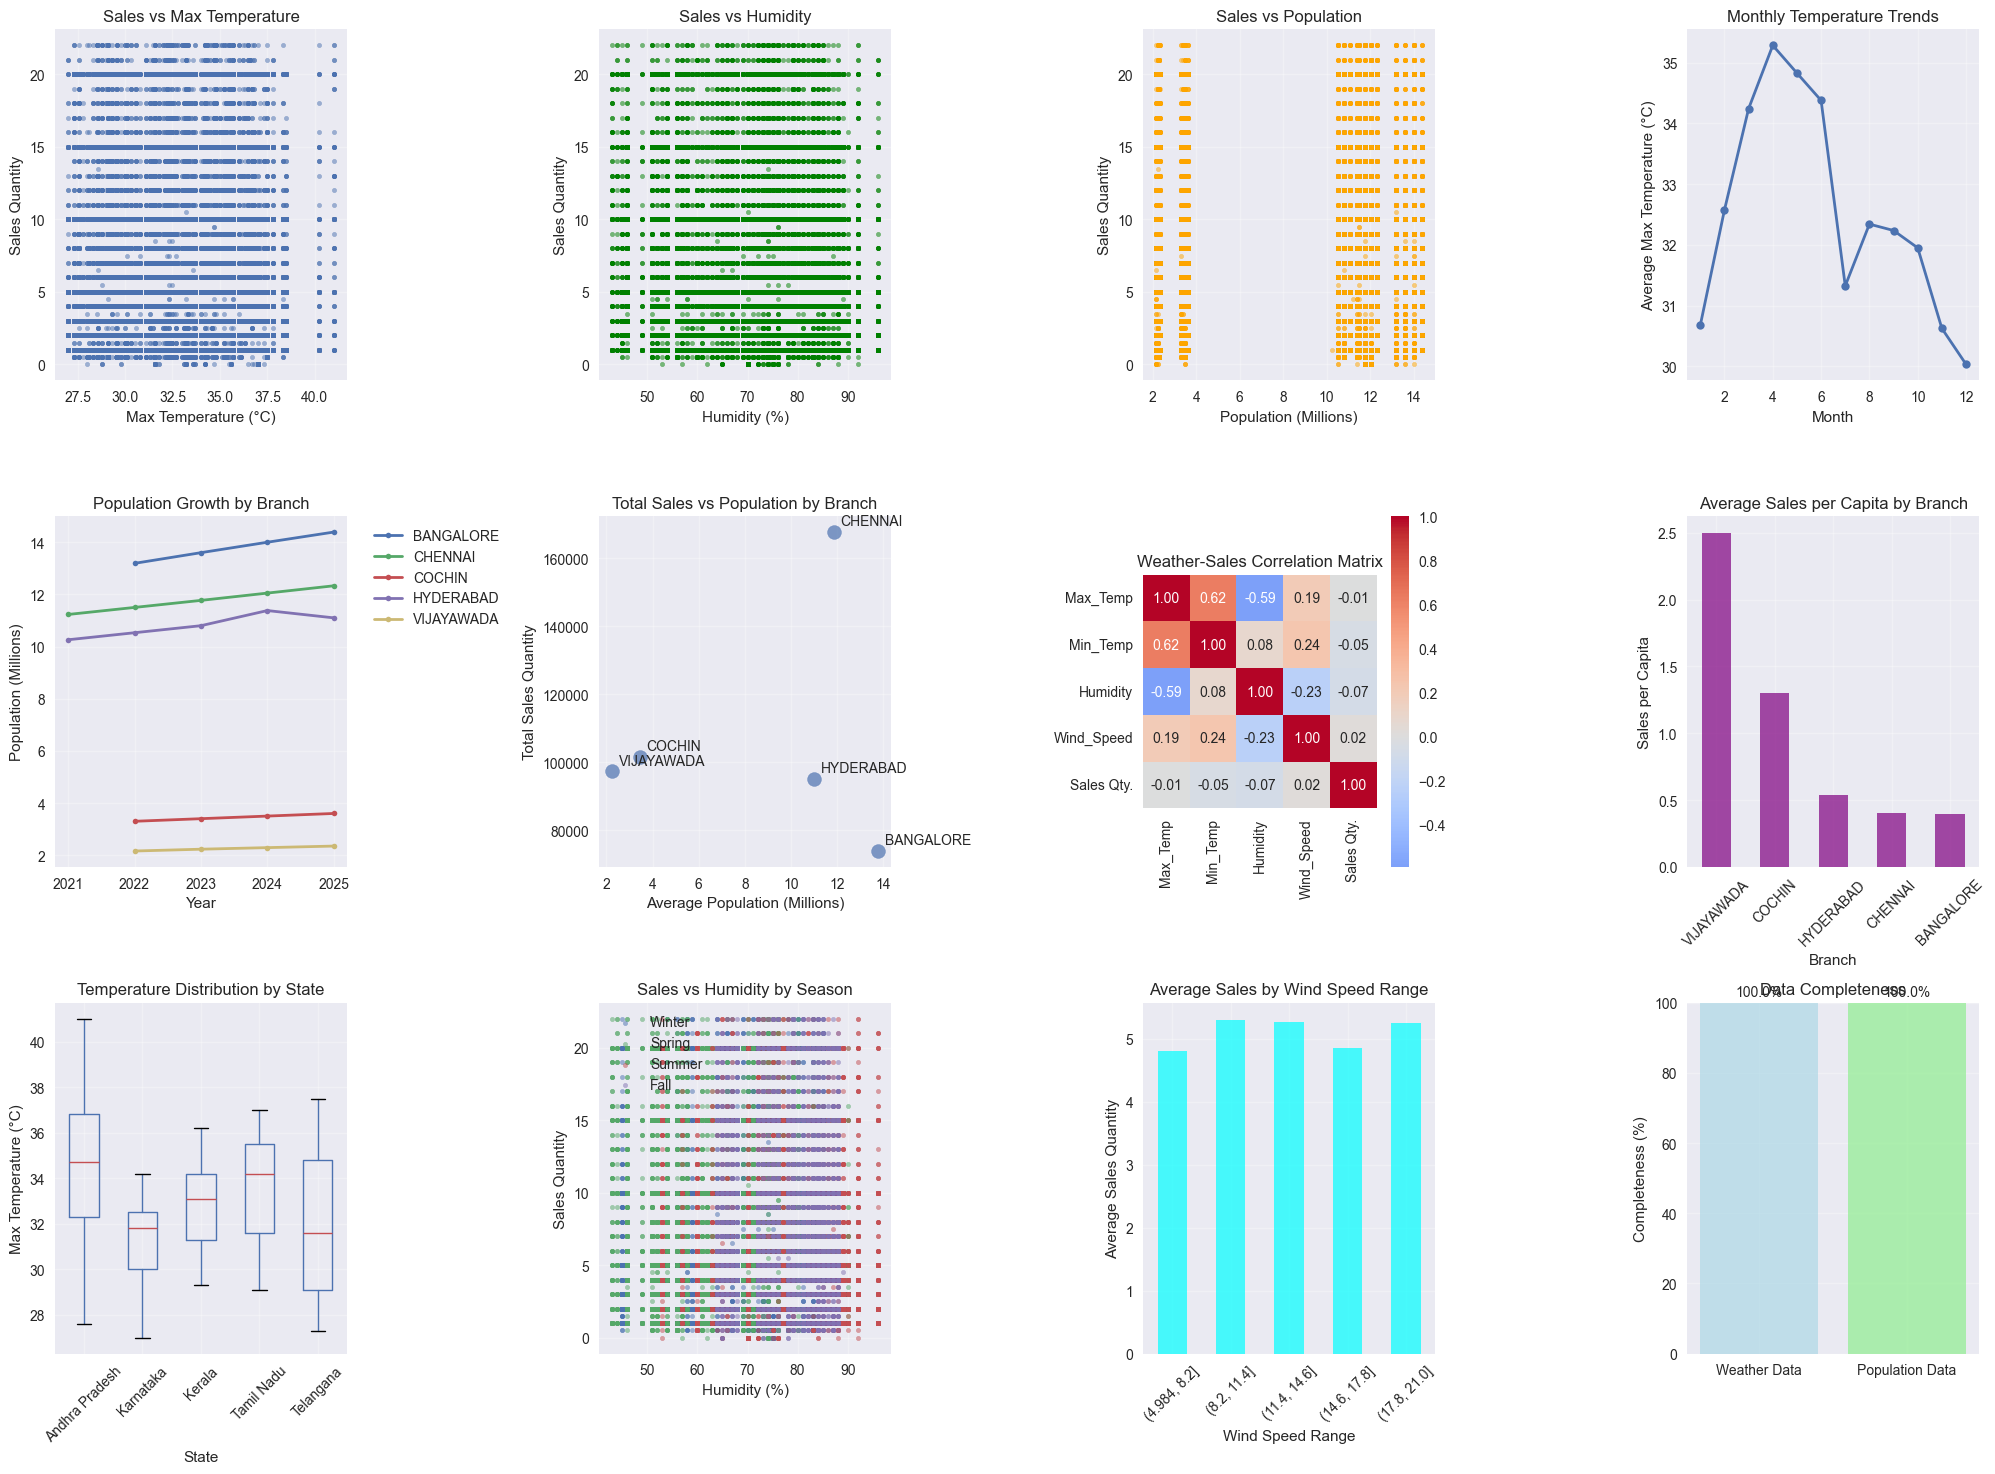

  ✅ Enhanced data visualizations completed


In [71]:
# 8. VISUALIZATION OF ENHANCED DATA
print("\n📊 8. VISUALIZATION OF ENHANCED DATA")
print("-" * 40)

# Create visualizations to show the enhanced data
plt.figure(figsize=(20, 15))

# Subplot 1: Sales vs Temperature correlation
if 'Max_Temp' in df.columns:
    plt.subplot(3, 4, 1)
    plt.scatter(df['Max_Temp'], df['Sales Qty.'], alpha=0.5, s=10)
    plt.xlabel('Max Temperature (°C)')
    plt.ylabel('Sales Quantity')
    plt.title('Sales vs Max Temperature')
    plt.grid(True, alpha=0.3)

# Subplot 2: Sales vs Humidity correlation
if 'Humidity' in df.columns:
    plt.subplot(3, 4, 2)
    plt.scatter(df['Humidity'], df['Sales Qty.'], alpha=0.5, s=10, color='green')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Sales Quantity')
    plt.title('Sales vs Humidity')
    plt.grid(True, alpha=0.3)

# Subplot 3: Sales vs Population correlation
if 'Population_Millions' in df.columns:
    plt.subplot(3, 4, 3)
    plt.scatter(df['Population_Millions'], df['Sales Qty.'], alpha=0.5, s=10, color='orange')
    plt.xlabel('Population (Millions)')
    plt.ylabel('Sales Quantity')
    plt.title('Sales vs Population')
    plt.grid(True, alpha=0.3)

# Subplot 4: Monthly temperature trends
if 'Max_Temp' in df.columns:
    plt.subplot(3, 4, 4)
    monthly_temp = df.groupby('Month')['Max_Temp'].mean()
    plt.plot(monthly_temp.index, monthly_temp.values, marker='o', linewidth=2, markersize=6)
    plt.xlabel('Month')
    plt.ylabel('Average Max Temperature (°C)')
    plt.title('Monthly Temperature Trends')
    plt.grid(True, alpha=0.3)

# Subplot 5: Population by branch over time
if 'Population_Millions' in df.columns:
    plt.subplot(3, 4, 5)
    pop_by_branch_year = df.groupby(['Branch', 'Year'])['Population_Millions'].first().unstack()
    for branch in pop_by_branch_year.index:
        plt.plot(pop_by_branch_year.columns, pop_by_branch_year.loc[branch], 
                marker='o', label=branch, linewidth=2, markersize=4)
    plt.xlabel('Year')
    plt.ylabel('Population (Millions)')
    plt.title('Population Growth by Branch')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)

# Subplot 6: Sales by branch with population
if 'Population_Millions' in df.columns:
    plt.subplot(3, 4, 6)
    branch_stats = df.groupby('Branch').agg({
        'Sales Qty.': 'sum',
        'Population_Millions': 'mean'
    })
    plt.scatter(branch_stats['Population_Millions'], branch_stats['Sales Qty.'], 
               s=100, alpha=0.7)
    for branch in branch_stats.index:
        plt.annotate(branch, 
                    (branch_stats.loc[branch, 'Population_Millions'], 
                     branch_stats.loc[branch, 'Sales Qty.']),
                    xytext=(5, 5), textcoords='offset points')
    plt.xlabel('Average Population (Millions)')
    plt.ylabel('Total Sales Quantity')
    plt.title('Total Sales vs Population by Branch')
    plt.grid(True, alpha=0.3)

# Subplot 7: Weather correlation heatmap
if all(col in df.columns for col in ['Max_Temp', 'Min_Temp', 'Humidity', 'Wind_Speed']):
    plt.subplot(3, 4, 7)
    weather_cols = ['Max_Temp', 'Min_Temp', 'Humidity', 'Wind_Speed', 'Sales Qty.']
    correlation_matrix = df[weather_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f')
    plt.title('Weather-Sales Correlation Matrix')

# Subplot 8: Sales per capita by branch
if 'Population_Millions' in df.columns:
    plt.subplot(3, 4, 8)
    df['Sales_Per_Capita'] = df['Sales Qty.'] / df['Population_Millions']
    sales_per_capita = df.groupby('Branch')['Sales_Per_Capita'].mean().sort_values(ascending=False)
    sales_per_capita.plot(kind='bar', color='purple', alpha=0.7)
    plt.title('Average Sales per Capita by Branch')
    plt.xlabel('Branch')
    plt.ylabel('Sales per Capita')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# Subplot 9: Temperature distribution by state
if 'Max_Temp' in df.columns:
    plt.subplot(3, 4, 9)
    df.boxplot(column='Max_Temp', by='State', ax=plt.gca())
    plt.title('Temperature Distribution by State')
    plt.xlabel('State')
    plt.ylabel('Max Temperature (°C)')
    plt.suptitle('')  # Remove default title
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# Subplot 10: Humidity vs Sales by season
if 'Humidity' in df.columns:
    plt.subplot(3, 4, 10)
    # Create season mapping
    season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
    df['Season'] = df['Month'].map(season_map)
    
    for season in ['Winter', 'Spring', 'Summer', 'Fall']:
        season_data = df[df['Season'] == season]
        if len(season_data) > 0:
            plt.scatter(season_data['Humidity'], season_data['Sales Qty.'], 
                       alpha=0.5, s=10, label=season)
    plt.xlabel('Humidity (%)')
    plt.ylabel('Sales Quantity')
    plt.title('Sales vs Humidity by Season')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Subplot 11: Wind speed impact on sales
if 'Wind_Speed' in df.columns:
    plt.subplot(3, 4, 11)
    wind_bins = pd.cut(df['Wind_Speed'], bins=5)
    wind_sales = df.groupby(wind_bins)['Sales Qty.'].mean()
    wind_sales.plot(kind='bar', color='cyan', alpha=0.7)
    plt.title('Average Sales by Wind Speed Range')
    plt.xlabel('Wind Speed Range')
    plt.ylabel('Average Sales Quantity')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# Subplot 12: Data completeness overview
plt.subplot(3, 4, 12)
completeness_data = []
if 'Max_Temp' in df.columns:
    completeness_data.append(('Weather Data', (1 - df['Max_Temp'].isnull().sum() / len(df)) * 100))
if 'Population_Millions' in df.columns:
    completeness_data.append(('Population Data', (1 - df['Population_Millions'].isnull().sum() / len(df)) * 100))

if completeness_data:
    labels, values = zip(*completeness_data)
    plt.bar(labels, values, color=['lightblue', 'lightgreen'], alpha=0.7)
    plt.title('Data Completeness')
    plt.ylabel('Completeness (%)')
    plt.ylim(0, 100)
    for i, v in enumerate(values):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("  ✅ Enhanced data visualizations completed")


In [72]:
# =============================================================================
# HANDLING MISSING POPULATION DATA
# =============================================================================

print("=" * 60)
print("HANDLING MISSING POPULATION DATA")
print("=" * 60)

# 1. CHECK CURRENT STATE OF MISSING DATA
print("\n🔍 1. CHECKING CURRENT STATE OF MISSING DATA")
print("-" * 40)

# Check missing values in key columns
missing_data = {
    'Population_Millions': df['Population_Millions'].isnull().sum(),
    'Sales_Per_Capita': df['Sales_Per_Capita'].isnull().sum() if 'Sales_Per_Capita' in df.columns else 0
}

print(f"  Missing values:")
for col, missing_count in missing_data.items():
    if col in df.columns:
        missing_pct = (missing_count / len(df)) * 100
        print(f"    • {col}: {missing_count:,} records ({missing_pct:.2f}%)")

# Check unique values in key columns
print(f"\n  Data overview:")
print(f"    • Unique Years in main data: {sorted(df['Year'].unique())}")
print(f"    • Unique Branches in main data: {sorted(df['Branch'].unique())}")
print(f"    • Unique Years in population data: {sorted(population_df['Year'].unique())}")
print(f"    • Unique Branches in population data: {sorted(population_df['Branch'].unique())}")

# Check for mismatched branch names
main_branches = set(df['Branch'].unique())
pop_branches = set(population_df['Branch'].unique())
print(f"\n  Branch name comparison:")
print(f"    • Main data branches: {main_branches}")
print(f"    • Population data branches: {pop_branches}")
print(f"    • Missing in population: {main_branches - pop_branches}")
print(f"    • Extra in population: {pop_branches - main_branches}")


HANDLING MISSING POPULATION DATA

🔍 1. CHECKING CURRENT STATE OF MISSING DATA
----------------------------------------
  Missing values:
    • Population_Millions: 0 records (0.00%)
    • Sales_Per_Capita: 0 records (0.00%)

  Data overview:
    • Unique Years in main data: [np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
    • Unique Branches in main data: ['BANGALORE', 'CHENNAI', 'COCHIN', 'HYDERABAD', 'VIJAYAWADA']
    • Unique Years in population data: [np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
    • Unique Branches in population data: ['BANGALORE', 'CHENNAI', 'COCHIN', 'HYDERABAD', 'VIJAYAWADA']

  Branch name comparison:
    • Main data branches: {'CHENNAI', 'HYDERABAD', 'COCHIN', 'BANGALORE', 'VIJAYAWADA'}
    • Population data branches: {'CHENNAI', 'HYDERABAD', 'COCHIN', 'BANGALORE', 'VIJAYAWADA'}
    • Missing in population: set()
    • Extra in population: set()


In [76]:
df.head().T

,0,1,2,3,4
Date,2021-11-25 00:00:00,2021-12-24 00:00:00,2022-01-04 00:00:00,2022-01-04 00:00:00,2022-01-11 00:00:00
Branch,CHENNAI,HYDERABAD,HYDERABAD,CHENNAI,HYDERABAD
Item Code,RHT50UV16V,RHT50UV16V,RHT50UV16V,RKL50UV16V,RKL35UV16W
Sales Qty.,4.5,1.0,2.0,1.0,20.0
State,Tamil Nadu,Telangana,Telangana,Tamil Nadu,Telangana
Status,Continue,Continue,Continue,Continue,Continue
Star rating,5 Star,5 Star,5 Star,3 Star,3 Star
Tonnage,1.5,1.5,1.5,1.5,1.0
Year,2021,2021,2022,2022,2022
Month,11,12,1,1,1


In [78]:
feature_engineering_df = df.copy()

feature_engineering_df.drop(columns=['Status', 'DayOfWeek', 'MonthName', 'Date_weather', 'Branch_Mapped'], inplace=True)
feature_engineering_df.head().T

,0,1,2,3,4
Date,2021-11-25 00:00:00,2021-12-24 00:00:00,2022-01-04 00:00:00,2022-01-04 00:00:00,2022-01-11 00:00:00
Branch,CHENNAI,HYDERABAD,HYDERABAD,CHENNAI,HYDERABAD
Item Code,RHT50UV16V,RHT50UV16V,RHT50UV16V,RKL50UV16V,RKL35UV16W
Sales Qty.,4.5,1.0,2.0,1.0,20.0
State,Tamil Nadu,Telangana,Telangana,Tamil Nadu,Telangana
Star rating,5 Star,5 Star,5 Star,3 Star,3 Star
Tonnage,1.5,1.5,1.5,1.5,1.0
Year,2021,2021,2022,2022,2022
Month,11,12,1,1,1
Day,25,24,4,4,11


In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

feature_engineering_df['Branch_encoded'] = le.fit_transform(feature_engineering_df['Branch'])
print(le.classes_)
feature_engineering_df['Item_Code_encoded'] = le.fit_transform(feature_engineering_df['Item Code'])
print(le.classes_)
feature_engineering_df['State_encoded'] = le.fit_transform(feature_engineering_df['State'])
print(le.classes_)
feature_engineering_df['Star_rating_encoded'] = le.fit_transform(feature_engineering_df['Star rating'])
print(le.classes_)
feature_engineering_df['Season_encoded'] = le.fit_transform(feature_engineering_df['Season'])
print(le.classes_)
feature_engineering_df['Tonnage_encoded'] = le.fit_transform(feature_engineering_df['Tonnage'])
print(le.classes_)

feature_engineering_df.head().T

['BANGALORE' 'CHENNAI' 'COCHIN' 'HYDERABAD' 'VIJAYAWADA']
['RE60UV16U2' 'RE60UV16U2-RV' 'REG60UV16U2' 'RHT35UV16W' 'RHT50UV16V'
 'RHT50UV16VA' 'RHT60UV16U' 'RKC35UV16W' 'RKC35UV16W3' 'RKC48UV16W'
 'RKC48UV16W3' 'RKC48UV16WF' 'RKC50UV16V' 'RKC50UV16VF' 'RKF35UV16U'
 'RKF50UV16T' 'RKJ35UV16W' 'RKJ50UV16U' 'RKJ50UV16V' 'RKJ60UV16U'
 'RKL35UV16W' 'RKL35UV16W-RV' 'RKL35UV16W3' 'RKL35UV16W3-RV' 'RKL35UV16WA'
 'RKL50UV16V' 'RKL50UV16V-RV' 'RKL50UV16V3' 'RKL50UV16V3-RV' 'RKL50UV16VA'
 'RKL50UV16VAF' 'RKL50UV16VAF-RV' 'RKL60UV16U' 'RKL60UV16U-RV'
 'RKL60UV16V' 'RKL60UV16V-RV' 'RKL71UV16M' 'RKL71UV16M-RV' 'RKL71UV16T'
 'RKL71UV16T-RV' 'RKL90UV16L' 'RKLG35UV16W' 'RKLG35UV16W3' 'RKLG50UV16V'
 'RKLG50UV16V3' 'RKLG60UV16U' 'RKLG71UV16T' 'RKM35UV16W' 'RKM35UV16W-RV'
 'RKM35UV16WA' 'RKM35UV16WA-RV' 'RKM50UV16U' 'RKM50UV16U-RV' 'RKM50UV16V'
 'RKM50UV16V-RV' 'RKM50UV16VA' 'RKM50UV16VA-RV' 'RKM60UV16M' 'RKM60UV16U'
 'RKM60UV16U-RV' 'RKMG35UV16W' 'RKMG50UV16U' 'RKMG50UV16V' 'RKR35UV16W'
 'RKR50UV16U' 'RKR

,0,1,2,3,4
Date,2021-11-25 00:00:00,2021-12-24 00:00:00,2022-01-04 00:00:00,2022-01-04 00:00:00,2022-01-11 00:00:00
Branch,CHENNAI,HYDERABAD,HYDERABAD,CHENNAI,HYDERABAD
Item Code,RHT50UV16V,RHT50UV16V,RHT50UV16V,RKL50UV16V,RKL35UV16W
Sales Qty.,4.5,1.0,2.0,1.0,20.0
State,Tamil Nadu,Telangana,Telangana,Tamil Nadu,Telangana
Star rating,5 Star,5 Star,5 Star,3 Star,3 Star
Tonnage,1.5,1.5,1.5,1.5,1.0
Year,2021,2021,2022,2022,2022
Month,11,12,1,1,1
Day,25,24,4,4,11


In [149]:
filtered_df = feature_engineering_df[
    (feature_engineering_df['Branch'] == 'CHENNAI') & 
    (feature_engineering_df['Tonnage'] == 1.5) & 
    (feature_engineering_df['Star rating'] == '5 Star') &
    (feature_engineering_df['Year'] > 2021) &
    (feature_engineering_df['Year'] < 2025)
]

filtered_df = filtered_df.reset_index(drop=True)
filtered_df.shape

(4071, 23)

In [150]:
filtered_df.drop(columns=['Branch','Item Code','State', 'Star rating', 'Day', 'Season', 'Branch_encoded', 'Item_Code_encoded', 'State_encoded', 'Star_rating_encoded', 'Tonnage_encoded'], inplace=True)

In [151]:
filtered_df.sort_values(by='Date', ascending=True).head(5)

,Date,Sales Qty.,Tonnage,Year,Month,Max_Temp,Min_Temp,Humidity,Wind_Speed,Population_Millions,Sales_Per_Capita,Season_encoded
0,2022-01-11,1.0,1.5,2022,1,30.5,24.0,84.0,9.0,11.5,0.086957,3
1,2022-01-27,3.0,1.5,2022,1,30.5,24.0,84.0,9.0,11.5,0.260870,3
2,2022-01-27,3.0,1.5,2022,1,30.5,24.0,84.0,9.0,11.5,0.260870,3
3,2022-01-28,4.0,1.5,2022,1,30.5,24.0,84.0,9.0,11.5,0.347826,3
4,2022-01-29,6.0,1.5,2022,1,30.5,24.0,84.0,9.0,11.5,0.521739,3


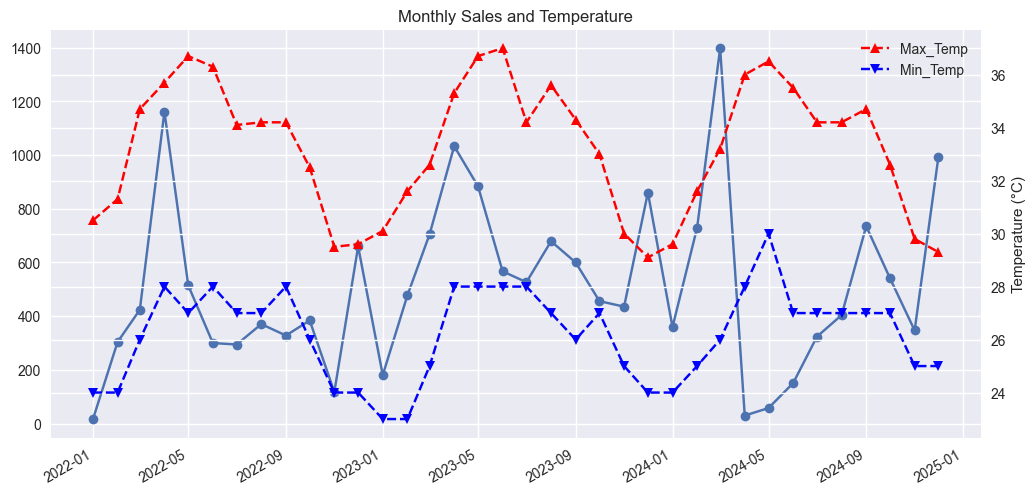

In [152]:
filtered_df['YearMonth'] = pd.to_datetime(filtered_df['Year'].astype(str) + '-' + filtered_df['Month'].astype(str) + '-01')

# Group by YearMonth and aggregate
monthly_data = filtered_df.groupby('YearMonth').agg({
    'Sales Qty.': 'sum',
    'Max_Temp': 'mean',   # or 'max' depending on your data
    'Min_Temp': 'mean'    # or 'min'
}).reset_index()

# Plot
plt.figure(figsize=(12,6))

# Sales Qty (primary y-axis)
plt.plot(monthly_data['YearMonth'], monthly_data['Sales Qty.'], marker='o', label='Sales Qty.')

# Temperature (secondary y-axis)
ax2 = plt.gca().twinx()
ax2.plot(monthly_data['YearMonth'], monthly_data['Max_Temp'], color='red', linestyle='--', marker='^', label='Max_Temp')
ax2.plot(monthly_data['YearMonth'], monthly_data['Min_Temp'], color='blue', linestyle='--', marker='v', label='Min_Temp')

# Labels and title
plt.xlabel('Month')
plt.gca().set_ylabel('Sales Qty.')
ax2.set_ylabel('Temperature (°C)')
plt.title('Monthly Sales and Temperature')

# Legends
plt.gca().legend(loc='upper left')
ax2.legend(loc='upper right')

# Format x-axis
plt.gcf().autofmt_xdate()

plt.show()

C:\Users\sahil\AppData\Local\Temp\ipykernel_38336\1427312656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2022['YearMonth'] = pd.to_datetime(filtered_df_2022['Year'].astype(str) + '-' + filtered_df_2022['Month'].astype(str) + '-01')


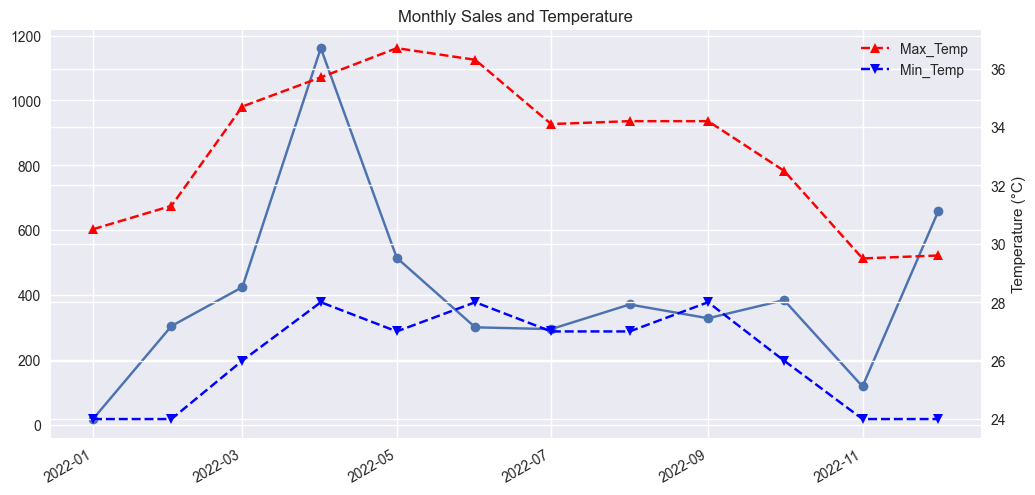

In [154]:
filtered_df_2022 = filtered_df[(filtered_df['Year'] == 2022)]
filtered_df_2022['YearMonth'] = pd.to_datetime(filtered_df_2022['Year'].astype(str) + '-' + filtered_df_2022['Month'].astype(str) + '-01')

# Group by YearMonth and aggregate
monthly_data = filtered_df_2022.groupby('YearMonth').agg({
    'Sales Qty.': 'sum',
    'Max_Temp': 'mean',   # or 'max' depending on your data
    'Min_Temp': 'mean',
}).reset_index()

# Plot
plt.figure(figsize=(12,6))

# Sales Qty (primary y-axis)
plt.plot(monthly_data['YearMonth'], monthly_data['Sales Qty.'], marker='o', label='Sales Qty.')

# Temperature (secondary y-axis)
ax2 = plt.gca().twinx()
ax2.plot(monthly_data['YearMonth'], monthly_data['Max_Temp'], color='red', linestyle='--', marker='^', label='Max_Temp')
ax2.plot(monthly_data['YearMonth'], monthly_data['Min_Temp'], color='blue', linestyle='--', marker='v', label='Min_Temp')

# Labels and title
plt.xlabel('Month')
plt.gca().set_ylabel('Sales Qty.')
ax2.set_ylabel('Temperature (°C)')
plt.title('Monthly Sales and Temperature')

# Legends
plt.gca().legend(loc='upper left')
ax2.legend(loc='upper right')

# Format x-axis
plt.gcf().autofmt_xdate()

plt.show()

C:\Users\sahil\AppData\Local\Temp\ipykernel_38336\568263855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2023['YearMonth'] = pd.to_datetime(filtered_df_2023['Year'].astype(str) + '-' + filtered_df_2023['Month'].astype(str) + '-01')


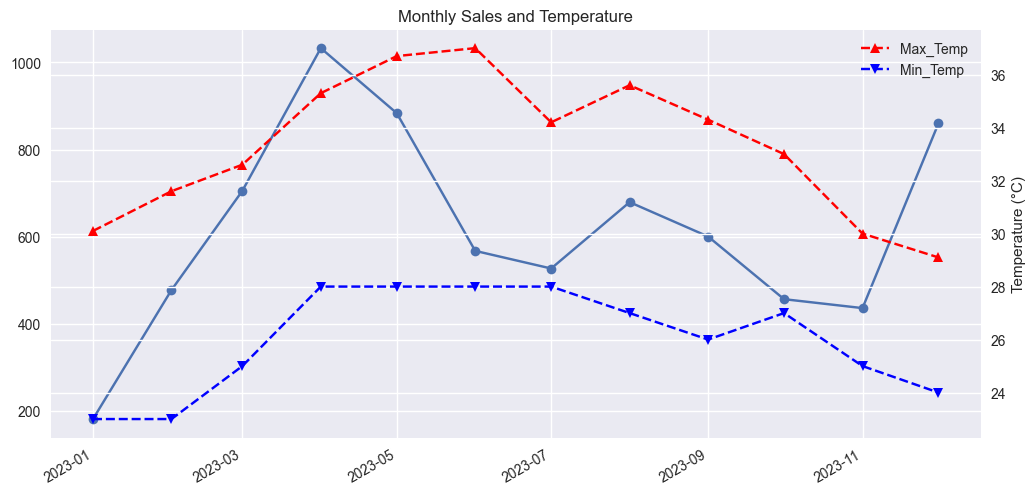

In [153]:
filtered_df_2023 = filtered_df[(filtered_df['Year'] == 2023)]
filtered_df_2023['YearMonth'] = pd.to_datetime(filtered_df_2023['Year'].astype(str) + '-' + filtered_df_2023['Month'].astype(str) + '-01')

# Group by YearMonth and aggregate
monthly_data = filtered_df_2023.groupby('YearMonth').agg({
    'Sales Qty.': 'sum',
    'Max_Temp': 'mean',   # or 'max' depending on your data
    'Min_Temp': 'mean'    # or 'min'
}).reset_index()

# Plot
plt.figure(figsize=(12,6))

# Sales Qty (primary y-axis)
plt.plot(monthly_data['YearMonth'], monthly_data['Sales Qty.'], marker='o', label='Sales Qty.')

# Temperature (secondary y-axis)
ax2 = plt.gca().twinx()
ax2.plot(monthly_data['YearMonth'], monthly_data['Max_Temp'], color='red', linestyle='--', marker='^', label='Max_Temp')
ax2.plot(monthly_data['YearMonth'], monthly_data['Min_Temp'], color='blue', linestyle='--', marker='v', label='Min_Temp')

# Labels and title
plt.xlabel('Month')
plt.gca().set_ylabel('Sales Qty.')
ax2.set_ylabel('Temperature (°C)')
plt.title('Monthly Sales and Temperature')

# Legends
plt.gca().legend(loc='upper left')
ax2.legend(loc='upper right')

# Format x-axis
plt.gcf().autofmt_xdate()

plt.show()

C:\Users\sahil\AppData\Local\Temp\ipykernel_38336\1371429765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2024['YearMonth'] = pd.to_datetime(filtered_df_2024['Year'].astype(str) + '-' + filtered_df_2024['Month'].astype(str) + '-01')


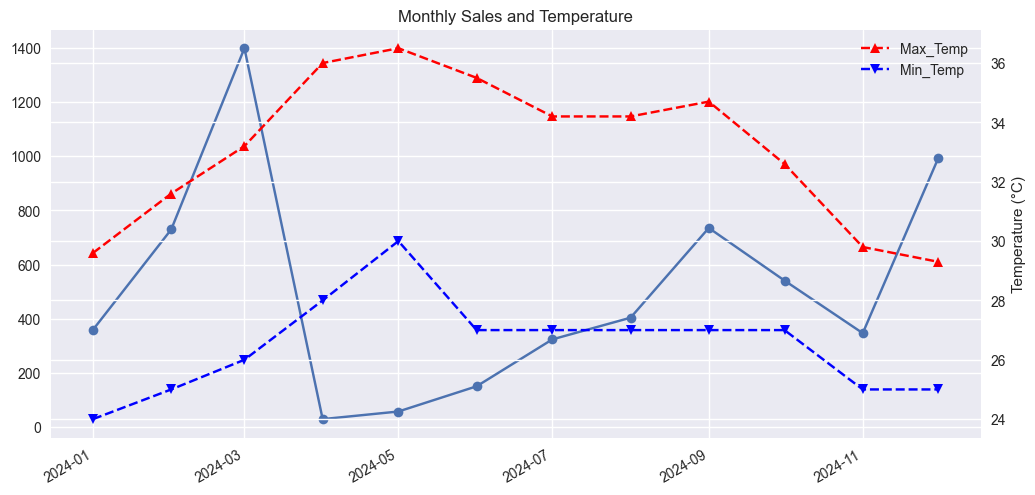

In [155]:
filtered_df_2024 = filtered_df[(filtered_df['Year'] == 2024)]
filtered_df_2024['YearMonth'] = pd.to_datetime(filtered_df_2024['Year'].astype(str) + '-' + filtered_df_2024['Month'].astype(str) + '-01')

# Group by YearMonth and aggregate
monthly_data = filtered_df_2024.groupby('YearMonth').agg({
    'Sales Qty.': 'sum',
    'Max_Temp': 'mean',   # or 'max' depending on your data
    'Min_Temp': 'mean',
}).reset_index()

# Plot
plt.figure(figsize=(12,6))

# Sales Qty (primary y-axis)
plt.plot(monthly_data['YearMonth'], monthly_data['Sales Qty.'], marker='o', label='Sales Qty.')

# Temperature (secondary y-axis)
ax2 = plt.gca().twinx()
ax2.plot(monthly_data['YearMonth'], monthly_data['Max_Temp'], color='red', linestyle='--', marker='^', label='Max_Temp')
ax2.plot(monthly_data['YearMonth'], monthly_data['Min_Temp'], color='blue', linestyle='--', marker='v', label='Min_Temp')

# Labels and title
plt.xlabel('Month')
plt.gca().set_ylabel('Sales Qty.')
ax2.set_ylabel('Temperature (°C)')
plt.title('Monthly Sales and Temperature')

# Legends
plt.gca().legend(loc='upper left')
ax2.legend(loc='upper right')

# Format x-axis
plt.gcf().autofmt_xdate()

plt.show()

In [184]:
filtered_df.groupby('YearMonth').agg({
    'Sales Qty.': 'sum',
    'Max_Temp': 'mean',   # or 'max' depending on your data
    'Min_Temp': 'mean',
    'Humidity': 'mean',
    'Wind_Speed': 'mean',
    'Population_Millions': 'mean',
    'Sales_Per_Capita': 'mean',
    'Season_encoded': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index().to_csv('chennai_1.5_5_star_monthly_data.csv', index=False)



In [183]:
test_df = feature_engineering_df[
    (feature_engineering_df['Branch'] == 'CHENNAI') & 
    (feature_engineering_df['Tonnage'] == 1.5) & 
    (feature_engineering_df['Star rating'] == '5 Star') &
    (feature_engineering_df['Year'] == 2025)
]

test_df = test_df.reset_index(drop=True)
test_df.shape

test_df.drop(columns=['Branch','Item Code','State', 'Star rating', 'Day', 'Season', 'Branch_encoded', 'Item_Code_encoded', 'State_encoded', 'Star_rating_encoded', 'Tonnage_encoded'], inplace=True)

test_df['YearMonth'] = pd.to_datetime(test_df['Year'].astype(str) + '-' + test_df['Month'].astype(str) + '-01')


In [185]:
test_df.head()

,Date,Sales Qty.,Tonnage,Year,Month,Max_Temp,Min_Temp,Humidity,Wind_Speed,Population_Millions,Sales_Per_Capita,Season_encoded,YearMonth
0,2025-01-04,2.0,1.5,2025,1,29.1,23.0,79.0,11.0,12.33,0.162206,3,2025-01-01
1,2025-01-04,10.0,1.5,2025,1,29.1,23.0,79.0,11.0,12.33,0.811030,3,2025-01-01
2,2025-01-07,1.0,1.5,2025,1,29.1,23.0,79.0,11.0,12.33,0.081103,3,2025-01-01
3,2025-01-08,2.0,1.5,2025,1,29.1,23.0,79.0,11.0,12.33,0.162206,3,2025-01-01
4,2025-01-08,3.0,1.5,2025,1,29.1,23.0,79.0,11.0,12.33,0.243309,3,2025-01-01


In [186]:
test_df.groupby('YearMonth').agg({
    'Sales Qty.': 'sum',
    'Max_Temp': 'mean',   # or 'max' depending on your data
    'Min_Temp': 'mean',
    'Humidity': 'mean',
    'Wind_Speed': 'mean',
    'Population_Millions': 'mean',
    'Sales_Per_Capita': 'mean',
    'Season_encoded': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index().to_csv('chennai_1.5_5_star_monthly_data_test.csv', index=False)